# Book Chapter- 1

In [365]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas Properties 
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### The pandas Series object

In [3]:
s = Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
s[1]

2

In [5]:
s[[1,3]]

1    2
3    4
dtype: int64

In [7]:
s= Series([1,2,3,4], index= ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
s['a']

1

In [9]:
s[['a', 'b']]

a    1
b    2
dtype: int64

In [10]:
s[1]

2

In [11]:
s[[1,2]]

b    2
c    3
dtype: int64

In [12]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
dates = pd.date_range('2014-07-01', '2014-07-06')
dates

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# representing temperatures
temp1  = Series([80, 82, 85, 90, 83, 87],index= dates)
temp1

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64

In [16]:
temp1.mean()

84.5

In [18]:
temp2 = Series([70, 75, 69, 83, 79, 77],index = dates)
# and calculates the difference at those matching labels
temp_diffs = temp1 - temp2
temp_diffs

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [19]:
temp_diffs['2014-07']

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [20]:
temp_diffs['2014-07-03']

16

In [21]:
# and also possible by integer position as if the
# series was an array
temp_diffs[2]

16

In [25]:
temps_df = DataFrame({'Missoula': temp1,'Philadelphia': temp2})
temps_df

            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77

In [26]:
temps_df['Missoula']

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [28]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87

In [29]:
temps_df.Philadelphia

2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [30]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [32]:
# add a column to temp_df that contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [34]:
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [35]:
# slice the temp differences column for the rows at
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [36]:
temps_df[1:4]

            Missoula  Philadelphia  Difference
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7

In [42]:
# temps_df['2014-07-02'] ## This will through an error as datafram can't be accessable 

In [38]:
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [43]:
# retrieve row by index label using .loc
temps_df.loc['2014-07-03']

Missoula        85
Philadelphia    69
Difference      16
Name: 2014-07-03 00:00:00, dtype: int64

In [47]:
temps_df.iloc[[1,2,3]].Difference

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [51]:
temps_df.Missoula > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [53]:
temps_df['Missoula'] > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [55]:
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [60]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//test1.csv"
df = pd.read_csv(url)
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

In [61]:
df.date

0    2000-01-01 00:00:00
1    2000-01-02 00:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-05 00:00:00
5    2000-01-06 00:00:00
6    2000-01-07 00:00:00
7    2000-01-08 00:00:00
8    2000-01-09 00:00:00
9    2000-01-10 00:00:00
Name: date, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
date    10 non-null object
0       10 non-null float64
1       10 non-null float64
2       10 non-null float64
dtypes: float64(3), object(1)
memory usage: 400.0+ bytes


In [63]:
df.date[0]

'2000-01-01 00:00:00'

In [64]:
type(df.date[0])

str

In [65]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//test1.csv"
df = pd.read_csv(url, parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [66]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [70]:
# read in again, now specify the data column as being the
# index of the resulting DataFrame
df = pd.read_csv(url,
                    parse_dates=['date'],
                    index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [71]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [90]:
'''Starting in 0.19.0, pandas no longer supports pandas.io.data or pandas.io.wb, 
so you must replace your imports from pandas.io with those from pandas_datareader:
'''

# imports for reading data from Yahoo!
from pandas_datareader import data
# from pandas.io.data import DataReader
# from pandas_datareader import data, web

from pandas_datareader import data as pdr
import fix_yahoo_finance


from datetime import date
from dateutil.relativedelta import relativedelta
# read the last three months of data for GOOG
goog = pdr.get_data_yahoo("GOOG",date.today() + relativedelta(months=-3))
# the result is a DataFrame
#and this gives us the 5 most recent prices
goog.tail()

                   High          Low         Open        Close   Volume  \
Date                                                                      
2019-05-13  1147.939941  1122.109985  1141.959961  1132.030029  1860600   
2019-05-14  1140.420044  1119.550049  1137.209961  1120.439941  1836600   
2019-05-15  1171.329956  1116.666016  1117.869995  1164.209961  2289300   
2019-05-16  1188.160034  1162.839966  1164.510010  1178.979980  1531400   
2019-05-17  1180.150024  1160.010010  1168.469971  1162.300049  1208100   

              Adj Close  
Date                     
2019-05-13  1132.030029  
2019-05-14  1120.439941  
2019-05-15  1164.209961  
2019-05-16  1178.979980  
2019-05-17  1162.300049  

In [91]:
goog.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [92]:
goog.index

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08',
      

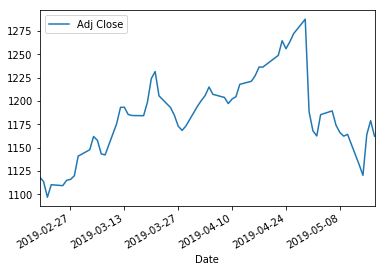

In [93]:
goog.plot(y = 'Adj Close')

In [94]:
import pandas as pd
pd.__version__

'0.24.2'

In [100]:
df = pd.DataFrame.from_items([('column1', [1, 2, 3])])
df

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


   column1
0        1
1        2
2        3

In [103]:
# a function that squares all the values
# in a sequence
def squares(values):
    result = []
    for v in values:
        result.append(v * v)
    return result
# create 100,000 numbers using python range
to_square = range(100000)
# time how long it takes to repeatedly square them all
%timeit squares(to_square)

10.4 ms ± 553 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
# now lets do this with a numpy array
array_to_square = np.arange(0, 100000)
# and time using a vectorized operation
%timeit array_to_square ** 2

69.3 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [105]:
a1 = np.array([1,2,3,4,5])
a1

array([1, 2, 3, 4, 5])

In [106]:
type(a1)

numpy.ndarray

In [107]:
np.size(a1)

5

In [108]:
len(a1)

5

In [110]:
# any float in the sequences makes
# it an array of floats
a2 = np.array([1, 2, 3, 4.0, 5.0])
a2

array([1., 2., 3., 4., 5.])

In [112]:
a2.dtype

dtype('float64')

In [117]:
# shorthand to repeat a sequence 10 times
a3 = np.array([0]*10)
a3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
## above not the most efficient manner
np.zeros(10)
# force it to be of int instead of float64
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
# make "a range" starting at 0 and with 10 values
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [126]:
# 0 <= x < 10 increment by two
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [127]:
# 10 >= x > 0, counting down
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [128]:
# evenly spaced #'s between two intervals
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [133]:
# multiply numpy array by 2
a1 = np.arange(0, 10)
# add two numpy arrays
a2 = np.arange(10, 20)
a1+ a2

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [134]:
# create a 2-dimensional array (2x2)
np.array([[1,2], [3,4]])

array([[1, 2],
       [3, 4]])

In [136]:
# create a 1x20 array, and reshape to a 5x4 2d-array
m = np.arange(0, 20).reshape(5, 4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [137]:
np.size(m)

20

In [139]:
np.size(m, 0) # can ask the size along a given axis (0 is rows)

5

In [140]:
np.size(m, 1) # can ask the size along a given axis (1 is column)

4

In [141]:
a1[0], a2 [1]

(0, 11)

In [142]:
m.shape

(5, 4)

In [143]:
m.ndim

2

In [145]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [146]:
m[1,2]

6

In [147]:
m [1,:]

array([4, 5, 6, 7])

In [148]:
m [1,]

array([4, 5, 6, 7])

In [149]:
m[1]

array([4, 5, 6, 7])

In [150]:
m[:,2]

array([ 2,  6, 10, 14, 18])

In [152]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [153]:
a < 2

array([ True,  True, False, False, False])

In [155]:
(a<2) | (a>3)

array([ True,  True, False, False,  True])

In [156]:
a

array([0, 1, 2, 3, 4])

In [157]:
# create a function that is applied to all array elements
def exp (x):
    return x<3 or x>3
# np.vectorize applies the method to all items in an array
np.vectorize(exp)(a)

array([ True,  True,  True, False,  True])

In [160]:
np.sum(a > 3)

1

In [161]:
a

array([0, 1, 2, 3, 4])

In [163]:
# Arrays can also be compared to other arrays
# This can be applied across two arrays
a1 = np.arange(0, 5)
a2 = np.arange(5, 0, -1)
a1, a2

(array([0, 1, 2, 3, 4]), array([5, 4, 3, 2, 1]))

In [164]:
a1 < a2

array([ True,  True,  True, False, False])

In [165]:
# and even multi dimensional arrays
a1 = np.arange(9).reshape(3, 3)
a2 = np.arange(9, 0 , -1).reshape(3, 3)
a1 < a2

array([[ True,  True,  True],
       [ True,  True, False],
       [False, False, False]])

In [169]:
# get all items in the array from position 3
# up to position 8 (but not inclusive)
a1 = np.arange(1, 10)
a1, a1[3:8]

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4, 5, 6, 7, 8]))

In [172]:
a1[::2]

array([1, 3, 5, 7, 9])

In [171]:
a1[::-1] # in reverse order

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [173]:
# note that when in reverse, this does not include
# that is, there is no 1 printed in this
a1[9:0:-1]  

array([9, 8, 7, 6, 5, 4, 3, 2])

In [174]:
# all items from position 5 onwards
a1[5:]

array([6, 7, 8, 9])

In [175]:
# the items in the first 5 positions
a1[:5]

array([1, 2, 3, 4, 5])

In [176]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [177]:
# we saw this earlier
# : in rows specifier means all rows
# so this gets items in column position 1, all rows
m[:,1]

array([ 1,  5,  9, 13, 17])

In [178]:
# in all rows, but for all columns in positions
# 1 up to but not including 3
m[:,1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14],
       [17, 18]])

In [179]:
# in row positions 3 up to but not including 5, all columns
m[3:5,:]

array([[12, 13, 14, 15],
       [16, 17, 18, 19]])

In [180]:
# combined to pull out a sub matrix of the matrix
m[3:5,1:3]

array([[13, 14],
       [17, 18]])

In [181]:
# using a python array, we can select
# non-contiguous rows or columns
m[[1,3,4],:]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [188]:
# create a 9 element array (1x9)
a = np.arange(0, 9)
# and reshape to a 3x3 2-d array
m = a.reshape(3, 3)

In [190]:
# and we can reshape downward in dimensions too
reshaped = m.reshape(9)
reshaped, m

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [191]:
# .ravel will generate array representing a flattened 2-d array
raveled = m.ravel()
raveled, m

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [192]:
# but it will be a view into the source
# so items changed in the result of the ravel
# are changed in the original object
# reshape m to an array
reshaped = m.reshape(np.size(m))
# ravel into an array
raveled = m.ravel()
# change values in either
reshaped[2] = 1000
raveled[5] = 2000
# and they show as changed in the original
m

array([[   0,    1, 1000],
       [   3,    4, 2000],
       [   6,    7,    8]])

In [195]:
# flattened is like ravel, but a copy of the data,
# not a view into the source
m2 = np.arange(0, 9).reshape(3,3)
flattened = m2.flatten()
# change in the flattened object
flattened[0] = 1000
flattened
# but not in the original
m2 , flattened

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([1000,    1,    2,    3,    4,    5,    6,    7,    8]))

In [197]:
flattened.shape #The .shape property returns a tuple representing the shape of the array

(9,)

In [198]:
# and make it 3x3
flattened.shape = (3, 3)
# it is no longer flattened
flattened

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8]])

In [199]:
# transpose a matrix
flattened.transpose()

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [200]:
# can also use .T property to transpose
flattened.T

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [201]:
# we can also use .resize, which changes shape of
# an object in-place
m = np.arange(0, 9).reshape(3,3)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [203]:
m.resize(1,9)
m

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [204]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [207]:
b = (a+1) *10
b, a

(array([[10, 20, 30],
        [40, 50, 60],
        [70, 80, 90]]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [209]:
np.hstack((a,b))

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [210]:
np.vstack((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [212]:
np.concatenate((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [213]:
np.concatenate((a,b), axis = 0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [214]:
np.concatenate((a,b), axis = 1)

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [215]:
np.dstack((a, b))

array([[[ 0, 10],
        [ 1, 20],
        [ 2, 30]],

       [[ 3, 40],
        [ 4, 50],
        [ 5, 60]],

       [[ 6, 70],
        [ 7, 80],
        [ 8, 90]]])

In [216]:
# set up 1-d array
one_d_a = np.arange(5)
one_d_a

array([0, 1, 2, 3, 4])

In [217]:
# another 1-d array
one_d_b = (one_d_a + 1) * 10
one_d_b

array([10, 20, 30, 40, 50])

In [218]:
np.column_stack((one_d_a, one_d_b))

array([[ 0, 10],
       [ 1, 20],
       [ 2, 30],
       [ 3, 40],
       [ 4, 50]])

In [219]:
# stack along rows
np.row_stack((one_d_a, one_d_b))

array([[ 0,  1,  2,  3,  4],
       [10, 20, 30, 40, 50]])

In [223]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [224]:
# horiz split the 2-d array into 4 array columns
np.hsplit(a, 4)

[array([[0],
        [4],
        [8]]), array([[1],
        [5],
        [9]]), array([[ 2],
        [ 6],
        [10]]), array([[ 3],
        [ 7],
        [11]])]

In [225]:
# horiz split into two array columns
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [226]:
# split at columns 1 and 3
np.hsplit(a, [1, 3])

[array([[0],
        [4],
        [8]]), array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]), array([[ 3],
        [ 7],
        [11]])]

In [227]:
# along the rows
np.split(a, 2, axis = 1)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [228]:
# new array for examples
a = np.arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [229]:
# split into four rows of arrays
np.vsplit(a, 4)

[array([[0, 1, 2]]),
 array([[3, 4, 5]]),
 array([[6, 7, 8]]),
 array([[ 9, 10, 11]])]

In [230]:
# into two rows of arrays
np.vsplit(a, 2)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [231]:
# split along axis=0
# row 0 of original is row 0 of new array
# rows 1 and 2 of original are row 1
np.vsplit(a, [1, 3])

[array([[0, 1, 2]]), array([[3, 4, 5],
        [6, 7, 8]]), array([[ 9, 10, 11]])]

In [232]:
# split can specify axis
np.split(a, 2, axis = 0)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [233]:
# 3-d array
c = np.arange(27).reshape(3, 3, 3)
c

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [234]:
# split into 3
np.dsplit(c, 3)

[array([[[ 0],
         [ 3],
         [ 6]],
 
        [[ 9],
         [12],
         [15]],
 
        [[18],
         [21],
         [24]]]), array([[[ 1],
         [ 4],
         [ 7]],
 
        [[10],
         [13],
         [16]],
 
        [[19],
         [22],
         [25]]]), array([[[ 2],
         [ 5],
         [ 8]],
 
        [[11],
         [14],
         [17]],
 
        [[20],
         [23],
         [26]]])]

In [240]:
# demonstrate some of the properties of NumPy arrays
m = np.arange(10, 19).reshape(3, 3)
print(m)


[[10 11 12]
 [13 14 15]
 [16 17 18]]


In [241]:
print ("{0} min of the entire matrix".format(m.min()))
print ("{0} max of entire matrix".format(m.max()))
print ("{0} position of the min value".format(m.argmin()))
print ("{0} position of the max value".format(m.argmax()))
print ("{0} mins down each column".format(m.min(axis = 0)))
print ("{0} mins across each row".format(m.min(axis = 1)))
print ("{0} maxs down each column".format(m.max(axis = 0)))
print ("{0} maxs across each row".format(m.max(axis = 1)))

10 min of the entire matrix
18 max of entire matrix
0 position of the min value
8 position of the max value
[10 11 12] mins down each column
[10 13 16] mins across each row
[16 17 18] maxs down each column
[12 15 18] maxs across each row


In [242]:
# demonstrate included statistical methods
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [243]:
a.mean(), a.std(), a.var()

(4.5, 2.8722813232690143, 8.25)

In [244]:
a = np.arange(1, 6)
a

array([1, 2, 3, 4, 5])

In [245]:
a.sum(), a.prod()

(15, 120)

In [247]:
a.cumsum() 

array([ 1,  3,  6, 10, 15], dtype=int32)

In [248]:
a.cumprod()

array([  1,   2,   6,  24, 120], dtype=int32)

In [249]:
# applying logical operators
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [250]:
(a<5).any()

True

In [251]:
(a<5).all()

False

In [253]:
np.size(a)

10

## Chapter 4. The pandas Series Object

In [254]:
# bring in NumPy and pandas
import numpy as np
import pandas as pd
# Set some pandas options for controlling output display
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [255]:
s1 = pd.Series(2)
s1

0    2
dtype: int64

In [256]:
# get value with label 0
s1[0]

2

In [259]:
# create a series of multiple items from a list
s2 = pd.Series([1, 22, 3, 4, 5])
s2

0     1
1    22
2     3
3     4
4     5
dtype: int64

In [260]:
s2.values

array([ 1, 22,  3,  4,  5], dtype=int64)

In [261]:
s2.index

RangeIndex(start=0, stop=5, step=1)

In [262]:
s1, s2

(0    2
 dtype: int64, 0     1
 1    22
 2     3
 3     4
 4     5
 dtype: int64)

In [263]:
# explicitly create an index
# index is alpha, not integer
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s3

a    1
b    2
c    3
dtype: int64

In [265]:
s3.index

Index(['a', 'b', 'c'], dtype='object')

In [269]:
s3['c']

3

In [270]:
# create Series from an existing index
# scalar value with be copied at each index label
s4 = pd.Series(2, index=s2.index)
s4

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [271]:
s2.index

RangeIndex(start=0, stop=5, step=1)

In [286]:
# generate a Series from 5 normal random numbers
np.random.seed(12345)
pd.Series(np.random.randn(5))

0   -0.204708
1    0.478943
2   -0.519439
3   -0.555730
4    1.965781
dtype: float64

In [287]:
# 0 through 9
pd.Series(np.linspace(0, 9, 10))

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [288]:
# 0 through 8
pd.Series(np.arange(0, 9))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int32

In [289]:
s6 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})
s6

a    1
b    2
c    3
d    4
dtype: int64

In [290]:
# example series, which also contains a NaN
s = pd.Series([0, 1, 1, 2, 3, 4, 5, 6, 7, np.nan])
s

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

In [291]:
len(s)

10

In [292]:
np.size(s)

10

In [294]:
s.size

10

In [295]:
s.shape

(10,)

In [296]:
# count() returns the number of non-NaN values
s.count()

9

In [297]:
s.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

In [298]:
s.value_counts()

1.0    2
7.0    1
6.0    1
5.0    1
4.0    1
3.0    1
2.0    1
0.0    1
dtype: int64

In [300]:
# first five
s.head()
# first three
s.head(n = 3) # s.head(3) is equivalent
s.tail()
# last 3
s.tail(n = 3) # equivalent to s.tail(3)

7    6.0
8    7.0
9    NaN
dtype: float64

In [301]:
s

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

In [303]:
s.take([0, 3, 9])  # The .take() method will return the rows in a series that correspond to the zero-based
# positions specified in a list:

0    0.0
3    2.0
9    NaN
dtype: float64

In [304]:
# single item lookup
s3['a']

1

In [305]:
s3

a    1
b    2
c    3
dtype: int64

In [306]:
s3[1]

2

In [307]:
s3[['a', 'b']]

a    1
b    2
dtype: int64

In [308]:
# series with an integer index, but not starting with 0
s5 = pd.Series([1, 2, 3], index=[10, 11, 12])
s5

10    1
11    2
12    3
dtype: int64

In [311]:
s5[10]

1

In [315]:
s5.loc[11]

2

In [316]:
s5.iloc[1]

2

In [317]:
# multiple items by label (loc)
s5.loc[[12, 10]]

12    3
10    1
dtype: int64

In [318]:
# multiple items by location / position (iloc)
s5.iloc[[0, 2]]

10    1
12    3
dtype: int64

In [319]:
s3

a    1
b    2
c    3
dtype: int64

In [320]:
s6 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s7 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
# add them
s6 + s7

a    2
b    4
c    6
d    8
dtype: int64

In [322]:
# see how different from adding numpy arrays
a1 = np.array([1, 2, 3, 4])
a2 = np.array([4, 3, 2, 1])
a1 + a2

array([5, 5, 5, 5])

In [323]:
s3 *2

a    2
b    4
c    6
dtype: int64

In [325]:
# scalar series using s3's index
t = pd.Series(2, s3.index)
t

a    2
b    2
c    2
dtype: int64

In [326]:
s3

a    1
b    2
c    3
dtype: int64

In [327]:
s3 *t 

a    2
b    4
c    6
dtype: int64

In [330]:
# going to add this to s11
s10 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
# going to add this to s10
s11 = pd.Series([4.0, 5.0, 6.0], index=['a', 'a', 'c'])


In [331]:
s10 + s11

a    5.0
a    6.0
a    6.0
a    7.0
b    NaN
c    NaN
dtype: float64

In [332]:
# mean of numpy array values
nda = np.array([1, 2, 3, 4, 5])
nda.mean()

3.0

In [333]:
# mean of numpy array values with a NaN
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean()

nan

In [334]:
# ignores NaN values
s = pd.Series(nda)
s.mean()

2.5

In [335]:
# which rows have values that are > 5?
s = pd.Series(np.arange(0, 10))
s > 5

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool

In [337]:
# sample series of five items
s = pd.Series(np.random.randn(5))
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    1.007189
b   -1.296221
c    0.274992
d    0.228913
e    1.352917
dtype: float64

In [338]:
# concat copies index values verbatim,
# potentially making duplicates
np.random.seed(123456)
s1 = pd.Series(np.random.randn(3))
s2 = pd.Series(np.random.randn(3))
combined = pd.concat([s1, s2])
combined

0    0.469112
1   -0.282863
2   -1.509059
0   -1.135632
1    1.212112
2   -0.173215
dtype: float64

In [341]:
combined.index = np.arange(0,len(combined))
combined

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

In [345]:
np.random.seed(123456)
s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
# reindex with different number of labels
# results in dropped rows and/or NaN's
s2 = s1.reindex(['a', 'c', 'g'])
s2

a    0.469112
c   -1.509059
g         NaN
dtype: float64

In [346]:
s1

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64

In [347]:
# s2 is a different Series than s1
s2['a'] = 0
s2

a    0.000000
c   -1.509059
g         NaN
dtype: float64

In [348]:
# this did not modify s1
s1

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64

In [349]:
# different types for the same values of labels
# causes big trouble
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

1. pandas first tries to align by the indexes and finds no matches, so it copies the index labels from the first series and tries to append the indexes from the second series.
2. However, since they are a different type, it defaults back to a zero-based integer sequence that results in duplicate values.
3. Finally, all values are NaN because the operation tries to add the item in the first series with the integer label 0, which has a value of 0, but can’t find the item in the other series and therefore, the result is NaN (and this fails six times in this case).

In [353]:
s2.index.values.astype(int)

array([0, 1, 2])

In [356]:
# reindex by casting the label types
# and we will get the desired result
s2.index = s2.index.values.astype(int)
s1 + s2

0    3
1    5
2    7
dtype: int64

In [360]:
# fill with 0 instead of NaN
s2 = s.copy()
s2.reindex(['a', 'f'], fill_value=0)

a    1.007189
f    0.000000
dtype: float64

In [363]:
s3 = pd.Series(['red', 'green', 'blue'], index=[0, 3, 5])
s3

0      red
3    green
5     blue
dtype: object

In [367]:
s3.reindex(np.arange(0,7))

0      red
1      NaN
2      NaN
3    green
4      NaN
5     blue
6      NaN
dtype: object

In [368]:
s3.reindex(np.arange(0,7), method='ffill')

0      red
1      red
2      red
3    green
4    green
5     blue
6     blue
dtype: object

In [369]:
# generate a Series to play with
np.random.seed(123456)
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s

a    0.469112
b   -0.282863
c   -1.509059
dtype: float64

In [373]:
# change a value in the Series
# this is done in-place
# a new Series is not returned that has a modified value
s['d'] = 100
s


a      0.469112
b     -0.282863
c     -1.509059
d    100.000000
dtype: float64

In [374]:
# modify the value at 'd' in-place
s['d'] = -100
s

a      0.469112
b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [375]:
# remove a row / item
del(s['a'])
s

b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [376]:
# a Series to use for slicing
# using index labels not starting at 0 to demonstrate
# position based slicing
s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [377]:
# items at position 0, 2, 4
s[0:6:2]

10    100
12    102
14    104
dtype: int32

In [378]:
s.iloc[0:6:2]

10    100
12    102
14    104
dtype: int32

In [380]:
s.loc[10:16:2]

10    100
12    102
14    104
16    106
dtype: int32

In [381]:
copy = s.copy() # preserve s
slice = copy[:2] # slice with first two rows
slice

10    100
11    101
dtype: int32

In [382]:
copy

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [383]:
# change item with label 10 to 1000
slice[11] = 1000
# and see it in the source
copy

10     100
11    1000
12     102
13     103
14     104
15     105
16     106
17     107
18     108
19     109
dtype: int32

In [384]:
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

# Chapter 5. The pandas DataFrame Object

In [385]:
# reference NumPy and pandas
import numpy as np
import pandas as pd
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [386]:
pd.DataFrame(np.array([[10, 11], [20, 21]]))

    0   1
0  10  11
1  20  21

In [388]:
df1 = pd.DataFrame([pd.Series(np.arange(10, 15)),
                    pd.Series(np.arange(15, 20))])
df1

    0   1   2   3   4
0  10  11  12  13  14
1  15  16  17  18  19

In [391]:
df1.shape

(2, 5)

In [401]:
df = pd.DataFrame(np.array([[10,11], [20,22]]), columns=['a', 'b'])
df

    a   b
0  10  11
1  20  22

In [395]:
df.columns

Index(['a', 'b'], dtype='object')

In [396]:
"{0}, {1}".format(df.columns[0], df.columns[1])

'a, b'

In [397]:
df.columns = ['c1', 'c2']
df

   c1  c2
0  10  11
1  20  22

In [399]:
df = pd.DataFrame(np.array([[0,1], [2,3]]),
                 columns=['c1', 'c2'],
                 index= ['r1','r2'])
df

    c1  c2
r1   0   1
r2   2   3

In [400]:
df.index

Index(['r1', 'r2'], dtype='object')

In [405]:
# create a DataFrame with two Series objects
# and a dictionary
s1 = pd.Series(np.arange(1, 6, 1))
s2 = pd.Series(np.arange(6, 11, 1))
pd.DataFrame({'c1': s1, 'c2': s2})

   c1  c2
0   1   6
1   2   7
2   3   8
3   4   9
4   5  10

In [406]:
# demonstrate alignment during creation
s3 = pd.Series(np.arange(12, 14), index=[1, 2])
df = pd.DataFrame({'c1': s1, 'c2': s2, 'c3': s3})
df

   c1  c2    c3
0   1   6   NaN
1   2   7  12.0
2   3   8  13.0
3   4   9   NaN
4   5  10   NaN

In [1]:
# reference NumPy and pandas
import numpy as np
import pandas as pd
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [4]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//sp500.csv"
# read in the data and print the first five rows
# use the Symbol column as the index, and
# only read in columns in positions 0, 2, 3, 7

sp500 = pd.read_csv(url,
                   index_col='Symbol',
                   usecols=[0, 2, 3, 7])

sp500.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [5]:
sp500.shape

(505, 3)

In [6]:
len(sp500)

505

In [7]:
sp500.index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=505)

In [8]:
sp500.columns

Index(['Sector', 'Price', '52 Week Low'], dtype='object')

In [10]:
sp500.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [14]:
sp500.iloc[:,[1,2]]

         Price  52 Week Low
Symbol                     
A        65.05        75.00
AAL      48.60        59.08
AAP     109.63       169.55
AAPL    155.15       180.10
ABBV    108.48       125.86
...        ...          ...
XYL      70.24        76.81
YUM      76.30        86.93
ZBH     115.53       133.49
ZION     50.71        55.61
ZTS      71.51        80.13

[505 rows x 2 columns]

In [21]:
# this is an exception, hence it is commented
# this tries to find a column named '1'
# not the row at position 1
# df = sp500[1]

In [19]:
# create a new DataFrame with integers as the column names
# make sure to use .copy() or change will be in-place
df = sp500.copy()
df.columns=[0, 1, 2]
df.head()

                             0       1       2
Symbol                                        
A                  Health Care   65.05   75.00
AAL                Industrials   48.60   59.08
AAP     Consumer Discretionary  109.63  169.55
AAPL    Information Technology  155.15  180.10
ABBV               Health Care  108.48  125.86

In [20]:
# this is not an exception
df[1]

Symbol
A        65.05
AAL      48.60
AAP     109.63
AAPL    155.15
ABBV    108.48
         ...  
XYL      70.24
YUM      76.30
ZBH     115.53
ZION     50.71
ZTS      71.51
Name: 1, Length: 505, dtype: float64

In [24]:
sp500.Price  # sp500['price']

Symbol
A        65.05
AAL      48.60
AAP     109.63
AAPL    155.15
ABBV    108.48
         ...  
XYL      70.24
YUM      76.30
ZBH     115.53
ZION     50.71
ZTS      71.51
Name: Price, Length: 505, dtype: float64

In [25]:
# get Price and Sector columns
# since a list is passed, the result is a DataFrame
sp500[['Price', 'Sector']]

         Price                  Sector
Symbol                                
A        65.05             Health Care
AAL      48.60             Industrials
AAP     109.63  Consumer Discretionary
AAPL    155.15  Information Technology
ABBV    108.48             Health Care
...        ...                     ...
XYL      70.24             Industrials
YUM      76.30  Consumer Discretionary
ZBH     115.53             Health Care
ZION     50.71              Financials
ZTS      71.51             Health Care

[505 rows x 2 columns]

In [26]:
sp500.columns

Index(['Sector', 'Price', '52 Week Low'], dtype='object')

In [28]:
sp500.columns.get_loc('52 Week Low')

2

In [29]:
# get the position of the column with the value of Price
loc = sp500.columns.get_loc('Price')
loc

1

In [30]:
sp500.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [37]:
sp500.loc['MMM']

Sector         Industrials
Price               222.89
52 Week Low         259.77
Name: MMM, dtype: object

In [38]:
sp500.index.get_loc('MMM')

313

In [39]:
sp500.iloc[313]

Sector         Industrials
Price               222.89
52 Week Low         259.77
Name: MMM, dtype: object

In [40]:
# get the location of MMM and A in the index
i1 = sp500.index.get_loc('MMM')
i2 = sp500.index.get_loc('A')
"{0} {1}".format(i1, i2)

'313 0'

In [41]:
sp500.at['MMM', 'Price']

222.89

In [42]:
# by location. Row 0, column 1
sp500.iat[0, 1]

65.05

In [43]:
sp500.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [46]:
sp500[(sp500.Price > 0) & (sp500.Price < 10)]

        Sector  Price  52 Week Low
Symbol                            
CHK     Energy   2.82         6.59

In [51]:
sp500[(sp500.Price > 0) & (sp500.Price < 10)][['52 Week Low','Price']]

        52 Week Low  Price
Symbol                    
CHK            6.59   2.82

In [54]:
sp500.column

Index(['Sector', 'Price', '52 Week Low'], dtype='object')

In [55]:
df = sp500.rename(columns={'Book Value': 'BookValue'})
# print first 2 rows
df[:2]

             Sector  Price  52 Week Low
Symbol                                 
A       Health Care  65.05        75.00
AAL     Industrials  48.60        59.08

In [60]:
copy_sp500 = sp500.copy()
copy_sp500['TwicePrice'] = sp500.Price * 2
copy_sp500[:2]

             Sector  Price  52 Week Low  TwicePrice
Symbol                                             
A       Health Care  65.05        75.00       130.1
AAL     Industrials  48.60        59.08        97.2

In [61]:
copy_sp500 = sp500.copy()
# insert sp500.Price * 2 as the
# second column in the DataFrame
copy_sp500.insert(1, 'TwicePrice', sp500.Price * 2)
copy_sp500[:2]

             Sector  TwicePrice  Price  52 Week Low
Symbol                                             
A       Health Care       130.1  65.05        75.00
AAL     Industrials        97.2  48.60        59.08

In [66]:
# extract the first four rows and just the Price column
rcopy = sp500[0:3][['Price']].copy()
rcopy


         Price
Symbol        
A        65.05
AAL      48.60
AAP     109.63

In [67]:
s = pd.Series({'A': 'Is in the DataFrame',
                'MSFT': 'Not in the DataFrame'})
s

A        Is in the DataFrame
MSFT    Not in the DataFrame
dtype: object

In [68]:
rcopy['commnets']=  s
rcopy.head()

         Price             commnets
Symbol                             
A        65.05  Is in the DataFrame
AAL      48.60                  NaN
AAP     109.63                  NaN

In [69]:
copy = sp500.copy()
copy.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [72]:
copy['Price'] = sp500.Price *10
copy.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   650.5        75.00
AAL                Industrials   486.0        59.08
AAP     Consumer Discretionary  1096.3       169.55
AAPL    Information Technology  1551.5       180.10
ABBV               Health Care  1084.8       125.86

In [86]:
# Example of using del to delete a column
# make a copy of a subset of the data frame
copy = sp500[:2].copy()
copy

             Sector  Price  52 Week Low
Symbol                                 
A       Health Care  65.05        75.00
AAL     Industrials  48.60        59.08

In [85]:
del copy['Sector']
copy.head()

        Price  52 Week Low
Symbol                    
A       65.05        75.00
AAL     48.60        59.08

In [80]:
copy.pop('Sector')


Symbol
A      Health Care
AAL    Industrials
Name: Sector, dtype: object

In [89]:
copy.drop(['Sector'], axis=1)

        Price  52 Week Low
Symbol                    
A       65.05        75.00
AAL     48.60        59.08

In [90]:
copy.head()

             Sector  Price  52 Week Low
Symbol                                 
A       Health Care  65.05        75.00
AAL     Industrials  48.60        59.08

In [93]:
# copy the first three rows of sp500
df1 = sp500.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = sp500.iloc[[10, 11, 2]]
# append df1 and df2
appended = df1.append(df2)
# the result is the rows of the first followed by
# those of the second
appendeds

                        Sector   Price  52 Week Low
Symbol                                             
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ADM           Consumer Staples   41.35        47.44
ADP     Information Technology  108.25       125.24
ADS     Information Technology  240.60       278.33

In [94]:
df1.index

Index(['AAL', 'AAP', 'AAPL'], dtype='object', name='Symbol')

In [97]:
# ignore index labels, create default index
df1.append(df2, ignore_index=True)

                   Sector   Price  52 Week Low
0             Industrials   48.60        59.08
1  Consumer Discretionary  109.63       169.55
2  Information Technology  155.15       180.10
3        Consumer Staples   41.35        47.44
4  Information Technology  108.25       125.24
5  Information Technology  240.60       278.33

In [98]:
# copy the first three rows of sp500
df1 = sp500.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = sp500.iloc[[10, 11, 2]]
# pass them as a list
pd.concat([df1, df2])

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
ADM           Consumer Staples   41.35        47.44
ADP     Information Technology  108.25       125.24
AAP     Consumer Discretionary  109.63       169.55

In [101]:
df2_2 = df2.copy()
df2_2.insert(3, 'Foo', pd.Series(0, index=df2.index))
df2_2

                        Sector   Price  52 Week Low  Foo
Symbol                                                  
ADM           Consumer Staples   41.35        47.44    0
ADP     Information Technology  108.25       125.24    0
AAP     Consumer Discretionary  109.63       169.55    0

In [102]:
# now concatenate
pd.concat([df1, df2_2])

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


        52 Week Low  Foo   Price                  Sector
Symbol                                                  
A             75.00  NaN   65.05             Health Care
AAL           59.08  NaN   48.60             Industrials
AAP          169.55  NaN  109.63  Consumer Discretionary
ADM           47.44  0.0   41.35        Consumer Staples
ADP          125.24  0.0  108.25  Information Technology
AAP          169.55  0.0  109.63  Consumer Discretionary

In [104]:
# now concatenate
pd.concat([df1, df2_2], keys=['df1', 'df2_2'])

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


              52 Week Low  Foo   Price                  Sector
      Symbol                                                  
df1   A             75.00  NaN   65.05             Health Care
      AAL           59.08  NaN   48.60             Industrials
      AAP          169.55  NaN  109.63  Consumer Discretionary
df2_2 ADM           47.44  0.0   41.35        Consumer Staples
      ADP          125.24  0.0  108.25  Information Technology
      AAP          169.55  0.0  109.63  Consumer Discretionary

In [110]:
# first three rows, columns 0 and 1
df3 = sp500.iloc[:3,[0, 1]]
# first three rows, column 2
df4 = sp500.iloc[:3,2]
pd.concat([df3, df4], axis=1)

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55

In [113]:
# get a small subset of the sp500
# make sure to copy the slice to make a copy
ss = sp500[:3].copy()
# create a new row with index label FOO
# and assign some values to the columns via a list
ss.loc['FOO'] = ['the sector', 100, 110]
ss

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
FOO                 the sector  100.00       110.00

In [114]:
# copy of subset / slice
ss = sp500[:3].copy()
# add the new column initialized to 0
ss.loc[:,'PER'] = 0
# take a look at the results
ss

                        Sector   Price  52 Week Low  PER
Symbol                                                  
A                  Health Care   65.05        75.00    0
AAL                Industrials   48.60        59.08    0
AAP     Consumer Discretionary  109.63       169.55    0

In [115]:
# get a copy of the first 5 rows of sp500
ss = sp500[:5].copy()
ss

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [116]:
ss.drop(['ABBV'])

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10

In [117]:
# note that ss is not modified
ss.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [118]:
# determine the rows where Price > 300
selection = sp500.Price > 300
# to make the output shorter, report the # of rows returned (500),
# and the sum of those where Price > 300 (which is 10)
"{0} {1}".format(len(selection), selection.sum())

'505 16'

In [120]:
sp500[~selection]

                        Sector    Price  52 Week Low
Symbol                                              
AMZN    Consumer Discretionary  1350.50    1498.0000
AZO     Consumer Discretionary   718.57     797.8900
BA                 Industrials   329.66     361.4500
BIIB               Health Care   311.79     370.5700
BLK                 Financials   509.38     594.5200
...                        ...      ...          ...
MTD                Health Care   601.00     697.2600
NOC                Industrials   324.01     349.1800
PCLN    Consumer Discretionary  1806.06    2067.9900
REGN               Health Care   322.62     543.5518
SHW                  Materials   387.65     435.1500

[16 rows x 3 columns]

In [121]:
subset = sp500[:3].copy()
subset.loc['MMM', 'Price'] = 10
subset.loc['ABBV', 'Price'] = 20
subset

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
MMM                        NaN   10.00          NaN
ABBV                       NaN   20.00          NaN

In [123]:
subset.loc['AAP', 'Price'] = 20000
subset

                        Sector     Price  52 Week Low
Symbol                                               
A                  Health Care     65.05        75.00
AAL                Industrials     48.60        59.08
AAP     Consumer Discretionary  20000.00       169.55
MMM                        NaN     10.00          NaN
ABBV                       NaN     20.00          NaN

In [129]:
# subset of the first three rows
subset = sp500[:3].copy()
# get the location of the Price column
price_loc = sp500.columns.get_loc('Price')
# get the location of the MMM row
abt_row_loc = sp500.index.get_loc('AAL')
# change the price
subset.iloc[abt_row_loc, price_loc] = 1000
subset

                        Sector    Price  52 Week Low
Symbol                                              
A                  Health Care    65.05        75.00
AAL                Industrials  1000.00        59.08
AAP     Consumer Discretionary   109.63       169.55

In [130]:
# set the seed to allow replicatable results
np.random.seed(123456)
# create the DataFrame
df = pd.DataFrame(np.random.randn(5, 4),
                    columns=['A', 'B', 'C', 'D'])
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

When performing an operation between a DataFrame and a Series, pandas will align the
Series index along the DataFrame columns, performing what is referred to as a row-wise
broadcast.

The following example retrieves the first row of the DataFrame, and then subtracts this
from each row of the DataFrame. pandas is broadcasting the Series to each row of the
DataFrame, which aligns each series item with the DataFrame item of the same index label
and then applies the minus operator on the matched values:

In [131]:
# get first row
s = df.iloc[0]
s

A    0.469112
B   -0.282863
C   -1.509059
D   -1.135632
Name: 0, dtype: float64

In [132]:
# subtract first row from every row of the DataFrame
diff = df - s
diff

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  0.743000  0.109649  1.628267  0.091396
2 -1.330961 -1.821706  1.014129  2.207436
3  0.252443 -0.423908  0.469484  1.407492
4 -0.894085  0.849884  1.785291  0.048232

In [133]:
# This also works when reversing the order by subtracting the DataFrame to the Series
# subtract DataFrame from Series
diff2 = s - df
diff2

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -0.743000 -0.109649 -1.628267 -0.091396
2  1.330961  1.821706 -1.014129 -2.207436
3 -0.252443  0.423908 -0.469484 -1.407492
4  0.894085 -0.849884 -1.785291 -0.048232

In [135]:
s2 = s[1:3]
s2

B   -0.282863
C   -1.509059
Name: 0, dtype: float64

In [137]:
s2['E'] =0
s2

B   -0.282863
C   -1.509059
E    0.000000
Name: 0, dtype: float64

In [138]:
# B, C
s2 = s[1:3]
# add E
s2['E'] = 0
# see how alignment is applied in math
df + s2

    A         B         C   D   E
0 NaN -0.565727 -3.018117 NaN NaN
1 NaN -0.456078 -1.389850 NaN NaN
2 NaN -2.387433 -2.003988 NaN NaN
3 NaN -0.989634 -2.548633 NaN NaN
4 NaN  0.284157 -1.232826 NaN NaN

In [139]:
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [150]:
# get rows 1 through three, and only B, C columns
subframe = df.iloc[1:4,[1,2]]   # subframe = df[1:4][['B', 'C']]
# demonstrate the alignment of the subtraction
print(subframe)
df - subframe

          B         C
1 -0.173215  0.119209
2 -2.104569 -0.494929
3 -0.706771 -1.039575


    A    B    C   D
0 NaN  NaN  NaN NaN
1 NaN  0.0  0.0 NaN
2 NaN  0.0  0.0 NaN
3 NaN  0.0  0.0 NaN
4 NaN  NaN  NaN NaN

In [154]:
# get the A column
a_col = df['A']
df.sub(a_col, axis=0)
#a_col

     A         B         C         D
0  0.0 -0.751976 -1.978171 -1.604745
1  0.0 -1.385327 -1.092903 -2.256348
2  0.0 -1.242720  0.366920  1.933653
3  0.0 -1.428326 -1.761130 -0.449695
4  0.0  0.991993  0.701204 -0.662428

In [157]:
sp500.head()

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86

In [156]:
# reset the index, moving it into a column
reset_sp500 = sp500.reset_index()
reset_sp500

    Symbol                  Sector   Price  52 Week Low
0        A             Health Care   65.05        75.00
1      AAL             Industrials   48.60        59.08
2      AAP  Consumer Discretionary  109.63       169.55
3     AAPL  Information Technology  155.15       180.10
4     ABBV             Health Care  108.48       125.86
..     ...                     ...     ...          ...
500    XYL             Industrials   70.24        76.81
501    YUM  Consumer Discretionary   76.30        86.93
502    ZBH             Health Care  115.53       133.49
503   ZION              Financials   50.71        55.61
504    ZTS             Health Care   71.51        80.13

[505 rows x 4 columns]

In [158]:
# move the Symbol column into the index
reset_sp500.set_index('Symbol')

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10
ABBV               Health Care  108.48       125.86
...                        ...     ...          ...
XYL                Industrials   70.24        76.81
YUM     Consumer Discretionary   76.30        86.93
ZBH                Health Care  115.53       133.49
ZION                Financials   50.71        55.61
ZTS                Health Care   71.51        80.13

[505 rows x 3 columns]

In [160]:
# get first four rows
subset = sp500[:4].copy()
subset

                        Sector   Price  52 Week Low
Symbol                                             
A                  Health Care   65.05        75.00
AAL                Industrials   48.60        59.08
AAP     Consumer Discretionary  109.63       169.55
AAPL    Information Technology  155.15       180.10

In [162]:
# reindex to have MMM, ABBV, and FOO index labels
reindexed= subset.reindex(index = ['MMM', 'AAL', 'AAPL'])
# Note that A, AAP are doppped and MMM are NaN values
reindexed

                        Sector   Price  52 Week Low
Symbol                                             
MMM                        NaN     NaN          NaN
AAL                Industrials   48.60        59.08
AAPL    Information Technology  155.15       180.10

__Reindexing can also be done upon the columns. The following reindexes the columns of__

In [163]:
subset.columns

Index(['Sector', 'Price', '52 Week Low'], dtype='object')

In [164]:
# reindex columns
subset.reindex(columns=['Sector','Price','NewCol'])

                        Sector   Price  NewCol
Symbol                                        
A                  Health Care   65.05     NaN
AAL                Industrials   48.60     NaN
AAP     Consumer Discretionary  109.63     NaN
AAPL    Information Technology  155.15     NaN

In [165]:
# first, push symbol into a column
reindexed = sp500.reset_index()

In [166]:
reindexed.head()

  Symbol                  Sector   Price  52 Week Low
0      A             Health Care   65.05        75.00
1    AAL             Industrials   48.60        59.08
2    AAP  Consumer Discretionary  109.63       169.55
3   AAPL  Information Technology  155.15       180.10
4   ABBV             Health Care  108.48       125.86

In [167]:
# and now index sp500 by sector and symbol
multi_fi = reindexed.set_index(['Sector', 'Symbol'])
multi_fi

                                Price  52 Week Low
Sector                 Symbol                     
Health Care            A        65.05        75.00
Industrials            AAL      48.60        59.08
Consumer Discretionary AAP     109.63       169.55
Information Technology AAPL    155.15       180.10
Health Care            ABBV    108.48       125.86
...                               ...          ...
Industrials            XYL      70.24        76.81
Consumer Discretionary YUM      76.30        86.93
Health Care            ZBH     115.53       133.49
Financials             ZION     50.71        55.61
Health Care            ZTS      71.51        80.13

[505 rows x 2 columns]

In [168]:
# the index is a MultiIndex
type(multi_fi.index)

pandas.core.indexes.multi.MultiIndex

In [171]:
# this has two levels
len(multi_fi.index.levels)

2

In [172]:
multi_fi.index.levels[0]

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Telecommunication Services', 'Utilities'],
      dtype='object', name='Sector')

In [173]:
multi_fi.index.levels[1]

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=505)

In [174]:
# values of the index level 0
multi_fi.index.get_level_values(0)

Index(['Health Care', 'Industrials', 'Consumer Discretionary',
       'Information Technology', 'Health Care', 'Health Care', 'Health Care',
       'Information Technology', 'Information Technology',
       'Information Technology',
       ...
       'Financials', 'Information Technology', 'Energy', 'Health Care',
       'Information Technology', 'Industrials', 'Consumer Discretionary',
       'Health Care', 'Financials', 'Health Care'],
      dtype='object', name='Sector', length=505)

In [175]:
# values of the index level 1
multi_fi.index.get_level_values(1)

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=505)

In [176]:
# get summary stats on non-numeric data
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [177]:
s

0      a
1      a
2      b
3      c
4    NaN
dtype: object

In [178]:
s.count() # non NaN values  The .count() method will return the number of values that are not part of NaN values in a Series

4

In [181]:
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [182]:
s.nunique()

3

In [183]:
s.value_counts()

a    2
c    1
b    1
dtype: int64

## Chapter 6. Accessing Data

In [184]:
# import pandas and numpy
import numpy as np
import pandas as pd
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [206]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//MSFT.csv"
msft = pd.read_csv(url)

In [207]:
msft.head()

        Date   Open   High    Low  Close      Volume  Adj. Close*
0  19-Sep-03  29.76  29.97  29.52  29.96  92433800.0        29.79
1  18-Sep-03  28.49  29.51  28.42  29.50  67268096.0        29.34
2  17-Sep-03  28.76  28.95  28.47  28.50  47221600.0        28.34
3  16-Sep-03  28.41  28.95  28.32  28.90  52060600.0        28.74
4  15-Sep-03  28.37  28.61  28.33  28.36  41432300.0        28.20

In [208]:
msft = pd.read_csv(url, index_col=0)
msft.head()

            Open   High    Low  Close      Volume  Adj. Close*
Date                                                          
19-Sep-03  29.76  29.97  29.52  29.96  92433800.0        29.79
18-Sep-03  28.49  29.51  28.42  29.50  67268096.0        29.34
17-Sep-03  28.76  28.95  28.47  28.50  47221600.0        28.34
16-Sep-03  28.41  28.95  28.32  28.90  52060600.0        28.74
15-Sep-03  28.37  28.61  28.33  28.36  41432300.0        28.20

In [209]:
msft.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Adj. Close*    float64
dtype: object

In [210]:
msft = pd.read_csv(url, dtype={'Volume': np.float64})
msft.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Adj. Close*    float64
dtype: object

In [212]:
# specify a new set of names for the columns
# all lower case, remove space in Adj Close
# also, header=0 skips the header row
df = pd.read_csv(url,header=0,names=['open', 'high', 'low','close', 'volume', 'adjclose'])
df

            open   high    low  close    volume  adjclose
19-Sep-03  29.76  29.97  29.52  29.96  92433800     29.79
18-Sep-03  28.49  29.51  28.42  29.50  67268096     29.34
17-Sep-03  28.76  28.95  28.47  28.50  47221600     28.34
16-Sep-03  28.41  28.95  28.32  28.90  52060600     28.74
15-Sep-03  28.37  28.61  28.33  28.36  41432300     28.20
...          ...    ...    ...    ...       ...       ...
25-Jun-03  25.64  25.99  25.14  25.26  60483500     25.12
24-Jun-03  25.65  26.04  25.52  25.70  51820300     25.56
23-Jun-03  26.14  26.24  25.49  25.78  52584500     25.64
20-Jun-03  26.34  26.38  26.01  26.33  86048896     26.18
19-Jun-03  26.09  26.39  26.01  26.07  63626900     25.92

[65 rows x 6 columns]

In [213]:
# read in data only in the Date and Close columns
# and index by the Date column
df2 = pd.read_csv(url,usecols=['Date', 'Close'],index_col=['Date'])
df2.head()

           Close
Date            
19-Sep-03  29.96
18-Sep-03  29.50
17-Sep-03  28.50
16-Sep-03  28.90
15-Sep-03  28.36

In [217]:
# save df2 to a new csv file
# also specify naming the index as date
df2.to_csv("msft_modified.csv", index_label='date')

In [221]:
# use read_table with sep=',' to read a CSV
df = pd.read_table(url, sep=',')
df

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


         Date   Open   High    Low  Close    Volume  Adj. Close*
0   19-Sep-03  29.76  29.97  29.52  29.96  92433800        29.79
1   18-Sep-03  28.49  29.51  28.42  29.50  67268096        29.34
2   17-Sep-03  28.76  28.95  28.47  28.50  47221600        28.34
3   16-Sep-03  28.41  28.95  28.32  28.90  52060600        28.74
4   15-Sep-03  28.37  28.61  28.33  28.36  41432300        28.20
..        ...    ...    ...    ...    ...       ...          ...
60  25-Jun-03  25.64  25.99  25.14  25.26  60483500        25.12
61  24-Jun-03  25.65  26.04  25.52  25.70  51820300        25.56
62  23-Jun-03  26.14  26.24  25.49  25.78  52584500        25.64
63  20-Jun-03  26.34  26.38  26.01  26.33  86048896        26.18
64  19-Jun-03  26.09  26.39  26.01  26.07  63626900        25.92

[65 rows x 7 columns]

In [223]:
# read, but skip rows 0, 2 and 3
df = pd.read_csv(url, skiprows=[0, 2, 3],names=['open', 'high', 'low','close', 'volume', 'adjclose'])
df

            open   high    low  close    volume  adjclose
19-Sep-03  29.76  29.97  29.52  29.96  92433800     29.79
16-Sep-03  28.41  28.95  28.32  28.90  52060600     28.74
15-Sep-03  28.37  28.61  28.33  28.36  41432300     28.20
12-Sep-03  27.48  28.40  27.45  28.34  55777200     28.18
11-Sep-03  27.66  28.11  27.59  27.84  37813300     27.68
...          ...    ...    ...    ...       ...       ...
25-Jun-03  25.64  25.99  25.14  25.26  60483500     25.12
24-Jun-03  25.65  26.04  25.52  25.70  51820300     25.56
23-Jun-03  26.14  26.24  25.49  25.78  52584500     25.64
20-Jun-03  26.34  26.38  26.01  26.33  86048896     26.18
19-Jun-03  26.09  26.39  26.01  26.07  63626900     25.92

[63 rows x 6 columns]

In [224]:
# skip only two lines at the end
df = pd.read_csv(url, skiprows=[0, 2, 3],names=['open', 'high', 'low','close', 'volume', 'adjclose'])
df.tail()


             open   high    low  close      volume  adjclose
19-Jun-03   26.09  26.39  26.01  26.07  63626900.0     25.92
NaN           NaN    NaN    NaN    NaN         NaN       NaN
NaN           NaN    NaN    NaN    NaN         NaN       NaN
Thank ypu     NaN    NaN    NaN    NaN         NaN       NaN
Enjoy         NaN    NaN    NaN    NaN         NaN       NaN

In [228]:
# skip only two lines at the end
df = pd.read_csv(url,names=['open', 'high', 'low','close', 'volume', 'adjclose'], skipfooter=4, engine = 'python')
df.tail()

            open   high    low  close    volume adjclose
25-Jun-03  25.64  25.99  25.14  25.26  60483500    25.12
24-Jun-03  25.65  26.04  25.52   25.7  51820300    25.56
23-Jun-03  26.14  26.24  25.49  25.78  52584500    25.64
20-Jun-03  26.34  26.38  26.01  26.33  86048896    26.18
19-Jun-03  26.09  26.39  26.01  26.07  63626900    25.92

#### Note
Note that I had to specify engine = 'python'. At least with Anaconda, skip_footer,
without this option, gives a warning, as this option is not implemented by the default
underlying C implementation.

In [229]:
# only process the first three rows
pd.read_csv(url, nrows=3)

        Date   Open   High    Low  Close    Volume  Adj. Close*
0  19-Sep-03  29.76  29.97  29.52  29.96  92433800        29.79
1  18-Sep-03  28.49  29.51  28.42  29.50  67268096        29.34
2  17-Sep-03  28.76  28.95  28.47  28.50  47221600        28.34

In [232]:
# skip 100 lines, then only process the next five
pd.read_csv(url, skiprows=10, nrows=5,header=0,names=['open', 'high', 'low', 'close', 'vol','adjclose'])

            open   high    low  close        vol  adjclose
5-Sep-03   28.23  28.75  28.17  28.38   64024500     28.22
4-Sep-03   28.10  28.47  27.99  28.43   59840800     28.27
3-Sep-03   27.42  28.40  27.38  28.30  109437800     28.14
2-Sep-03   26.70  27.30  26.47  27.26   74168896     27.11
29-Aug-03  26.46  26.55  26.35  26.52   34503000     26.37

In [235]:
from pandas_datareader import data
# and datetime for the dates
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 1, 27)
start, end

(datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2014, 1, 27, 0, 0))

## Chapter 7. Tidying Up Your Data

    The concept of tidy data
    How pandas represents unknown values
    How to find NaN values in data
    How to filter (drop) data
    What pandas does with unknown values in calculations
    How to find, filter and fix unknown values
    How to identify and remove duplicate data
    How to transform values using replace, map, and apply

In [250]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd
import datetime
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Data is “missing” in pandas when it has a value of NaN (also seen as np.nan—the form from NumPy). The NaN value represents that in a particular Series that there is not a value specified for the particular index label.

In pandas, there are a number of reasons why a value can be NaN:

        A join of two sets of data does not have matched values
        Data that you retrieved from an external source is incomplete
        The NaN value is not known at a given point in time and will be filled in later
        There is a data collection error retrieving a value, but the event must still be recorded in the index
        Reindexing of data has resulted in an index that does not have a value
        The shape of data has changed and there are now additional rows or columns, which
        at the time of reshaping could not be determined

In [260]:
df = pd.DataFrame(np.arange(0,15).reshape(5,3)
                  ,index = ['a','b','c','d','e']
                  ,columns= ['c1','c2','c3'])

df

   c1  c2  c3
a   0   1   2
b   3   4   5
c   6   7   8
d   9  10  11
e  12  13  14

In [261]:
# add some columns and rows to the DataFrame
# column c4 with NaN values
df['c4'] = np.nan
# row 'f' with 15 through 18
df.loc['f'] = np.arange(15, 19)
# row 'g' will all NaN
df.loc['g'] = np.nan
# column 'C5' with NaN's
df['c5'] = np.nan
# change value in col 'c4' row 'a'
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0   NaN NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

This DataFrame object exhibits the following characteristics that will support most of the examples that follow in this section:

    One row consisting only of NaN values
    One column is consisiting only of NaN values
    Several rows and columns consisting of both numeric values and NaN values

In [263]:
# which items are NaN?
df.isnull()

      c1     c2     c3     c4    c5
a  False  False  False   True  True
b  False  False  False   True  True
c  False  False  False   True  True
d  False  False  False   True  True
e  False  False  False   True  True
f  False  False  False  False  True
g   True   True   True   True  True

In [265]:
df.isnull().sum()

c1    1
c2    1
c3    1
c4    6
c5    7
dtype: int64

In [266]:
df.isnull().sum().sum()

16

In [267]:
len(df)

7

In [271]:
df.count()   # it will give not null value

c1    6
c2    6
c3    6
c4    1
c5    0
dtype: int64

In [272]:
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0   NaN NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

In [276]:
# select the non-NaN items in column c4
df.c4[df.c4.notnull()]

f    18.0
Name: c4, dtype: float64

In [274]:
# .dropna will also return non NaN values
# this gets all non NaN items in column c4
df.c4.dropna()

f    18.0
Name: c4, dtype: float64

In [275]:
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0   NaN NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

In [278]:
'''When applied to a DataFrame object, .dropna() will drop all rows from a DataFrame
object that have at least one NaN value. The following code demonstrates this in action,
and since each row has at least one NaN value, there are no rows in the result:
'''
df.dropna()

Empty DataFrame
Columns: [c1, c2, c3, c4, c5]
Index: []

In [279]:
# using how='all', only rows that have all values
# as NaN will be dropped
df.dropna(how = 'all')

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0   NaN NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN

In [280]:
# flip to drop columns instead of rows
df.dropna(how='all', axis=1) # say goodbye to c5

     c1    c2    c3    c4
a   0.0   1.0   2.0   NaN
b   3.0   4.0   5.0   NaN
c   6.0   7.0   8.0   NaN
d   9.0  10.0  11.0   NaN
e  12.0  13.0  14.0   NaN
f  15.0  16.0  17.0  18.0
g   NaN   NaN   NaN   NaN

In [283]:
# make a copy of df
df2 = df.copy()
# replace two NaN cells with values
df2.ix['g'].c1 = 0
df2.ix['g'].c3 = 0

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [284]:
df2

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0   NaN NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   NaN   0.0   NaN NaN

In [285]:
# now drop columns with any NaN values
df2.dropna(how='any', axis=1)

     c1    c3
a   0.0   2.0
b   3.0   5.0
c   6.0   8.0
d   9.0  11.0
e  12.0  14.0
f  15.0  17.0
g   0.0   0.0

In [286]:
# only drop columns with at least 5 NaN values
df.dropna(thresh=5, axis=1)

     c1    c2    c3
a   0.0   1.0   2.0
b   3.0   4.0   5.0
c   6.0   7.0   8.0
d   9.0  10.0  11.0
e  12.0  13.0  14.0
f  15.0  16.0  17.0
g   NaN   NaN   NaN

__The NaN values are handled differently in pandas than in NumPy. This is demonstrated
using the following example__

In [288]:
# create a NumPy array with one NaN value
a = np.array([1, 2, np.nan, 3])
# create a Series from the array
s = pd.Series(a)
# the mean of each is different
a.mean(), s.mean()

(nan, 2.0)

## Note
Note that the mean of the preceding series was calculated as (1+2+3)/3 = 2, not (1+2+3)/4,
or (1+2+0+4)/4. This verifies that NaN is totally ignored and not even counted as an item in
the Series.

More specifically, the way that pandas handles NaN values is as follows:

    Summing of data treats NaN as 0
    If all values are NaN, the result is NaN
    Methods like .cumsum() and .cumprod() ignore NaN values, but preserve them in the
    resulting arrays

In [291]:
df.c4

a     NaN
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

In [292]:
# demonstrate sum, mean and cumsum handling of NaN
# get one column
s = df.c4
s.sum() # NaN values treated as 0

18.0

In [293]:
s.mean() # NaN also treated as 0

18.0

In [294]:
# in arithmetic, a NaN value will result in NaN
df.c4 + 1

a     NaN
b     NaN
c     NaN
d     NaN
e     NaN
f    19.0
g     NaN
Name: c4, dtype: float64

In [295]:
# return a new DataFrame with NaN values filled with 0
filled = df.fillna(0)
filled

     c1    c2    c3    c4   c5
a   0.0   1.0   2.0   0.0  0.0
b   3.0   4.0   5.0   0.0  0.0
c   6.0   7.0   8.0   0.0  0.0
d   9.0  10.0  11.0   0.0  0.0
e  12.0  13.0  14.0   0.0  0.0
f  15.0  16.0  17.0  18.0  0.0
g   0.0   0.0   0.0   0.0  0.0

In [296]:
# NaNs don't count as an item in calculating
# the means
df.mean()

c1     7.5
c2     8.5
c3     9.5
c4    18.0
c5     NaN
dtype: float64

In [297]:
# having replaced NaN with 0 can make
# operations such as mean have different results
filled.mean()

c1    6.428571
c2    7.285714
c3    8.142857
c4    2.571429
c5    0.000000
dtype: float64

In [298]:
# only fills the first two NaN values in each row with 0
df.fillna(0, limit=2)

     c1    c2    c3    c4   c5
a   0.0   1.0   2.0   0.0  0.0
b   3.0   4.0   5.0   0.0  0.0
c   6.0   7.0   8.0   NaN  NaN
d   9.0  10.0  11.0   NaN  NaN
e  12.0  13.0  14.0   NaN  NaN
f  15.0  16.0  17.0  18.0  NaN
g   0.0   0.0   0.0   NaN  NaN

In [305]:
df.loc['a']['c4'] = 20
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

In [306]:
# extract the c4 column and fill NaNs forward
df.c4.fillna(method="ffill")

a    20.0
b    20.0
c    20.0
d    20.0
e    20.0
f    18.0
g    18.0
Name: c4, dtype: float64

In [307]:
# perform a backwards fill
df.c4.fillna(method="bfill")

a    20.0
b    18.0
c    18.0
d    18.0
e    18.0
f    18.0
g     NaN
Name: c4, dtype: float64

In [311]:
# create a new Series of values to be
# used to fill NaN values where the index label matches
fill_values = pd.Series([100, 101, 102], index=['a', 'e', 'g'])
fill_values
# using c4, fill using fill_values
# a, e and g will be filled with matching values
df.c4.fillna(fill_values)



a     20.0
b      NaN
c      NaN
d      NaN
e    101.0
f     18.0
g    102.0
Name: c4, dtype: float64

In [312]:
# fill NaN values in each column with the
# mean of the values in that column
df.mean()

c1     7.5
c2     8.5
c3     9.5
c4    19.0
c5     NaN
dtype: float64

In [313]:
# fill NaN values in each column with the
# mean of the values in that column
df.fillna(df.mean())

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0  19.0 NaN
c   6.0   7.0   8.0  19.0 NaN
d   9.0  10.0  11.0  19.0 NaN
e  12.0  13.0  14.0  19.0 NaN
f  15.0  16.0  17.0  18.0 NaN
g   7.5   8.5   9.5  19.0 NaN

__The value of the interpolation is calculated by taking the first value before and after any
sequence of NaN values and then incrementally adding that value from the start and
substituting NaN values. In this case, 2.0 and 1.0 are the surrounding values, resulting in
(2.0 – 1.0)/(5-1) = 0.25, which is then added incrementally through all the NaN values__

In [316]:
# linear interpolate the NaN values from 1 through 2
s = pd.Series([1, np.nan, np.nan, np.nan, 2])
s.interpolate()

0    1.00
1    1.25
2    1.50
3    1.75
4    2.00
dtype: float64

In [318]:
# create a time series, but missing one date in the Series
ts = pd.Series([1, np.nan, 2],
index=[datetime.datetime(2014, 1, 1),
                datetime.datetime(2014, 2, 1),
                datetime.datetime(2014, 4, 1)])

ts

2014-01-01    1.0
2014-02-01    NaN
2014-04-01    2.0
dtype: float64

In [319]:
ts.interpolate()

2014-01-01    1.0
2014-02-01    1.5
2014-04-01    2.0
dtype: float64

The value for 2014-02-01 is calculated as 1.0 + (2.0-1.0)/2 = 1.5, since there is one NaN
value between the values 2.0 and 1.0

In [322]:

# this accounts for the fact that we don't have
# an entry for 2014-03-01
ts.interpolate(method="time")



2014-01-01    1.000000
2014-02-01    1.344444
2014-04-01    2.000000
dtype: float64

In [323]:
'''This is the correct interpolation for 2014-02-01 based upon dates. Also note that the index
label and value for 2014-03-01 is not added to the Series, it is just factored into the
interpolation.'''

'This is the correct interpolation for 2014-02-01 based upon dates. Also note that the index\nlabel and value for 2014-03-01 is not added to the Series, it is just factored into the\ninterpolation.'

In [326]:
# a Series to demonstrate index label based interpolation
s = pd.Series([0, np.nan, 100], index=[0, 1, 10])
s

0       0.0
1       NaN
10    100.0
dtype: float64

In [325]:
# linear interpolate
s.interpolate()

0       0.0
1      50.0
10    100.0
dtype: float64

__However, what if we want to interpolate the value to be relative to the index value? To do
this, we can use method="values":__

In [327]:
# interpolate based upon the values in the index
s.interpolate(method="values")

0       0.0
1      10.0
10    100.0
dtype: float64

In [328]:
# a DataFrame with lots of duplicate data
data = pd.DataFrame({'a': ['x'] * 3 + ['y'] * 4,
                        'b': [1, 1, 2, 3, 3, 4, 4]})
data

   a  b
0  x  1
1  x  1
2  x  2
3  y  3
4  y  3
5  y  4
6  y  4

In [329]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [330]:
data[data.duplicated()]

   a  b
1  x  1
4  y  3
6  y  4

In [331]:
# drop duplicate rows retaining first row of the duplicates
data.drop_duplicates()

   a  b
0  x  1
2  x  2
3  y  3
5  y  4

In [333]:
# drop duplicate rows, only keeping the first
# instance of any data
data.drop_duplicates(keep='last')

   a  b
1  x  1
2  x  2
4  y  3
6  y  4

In [336]:
# add a column c with values 0..6
# this makes .duplicated() report no duplicate rows
data['c'] = range(7)
data

   a  b  c
0  x  1  0
1  x  1  1
2  x  2  2
3  y  3  3
4  y  3  4
5  y  4  5
6  y  4  6

In [339]:

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [341]:
data

   a  b  c
0  x  1  0
1  x  1  1
2  x  2  2
3  y  3  3
4  y  3  4
5  y  4  5
6  y  4  6

In [340]:
# but if we specify duplicates to be dropped only in columns a & b
# they will be dropped
data.drop_duplicates(['a', 'b'])

   a  b  c
0  x  1  0
2  x  2  2
3  y  3  3
5  y  4  5

In [343]:
# create two Series objects to demonstrate mapping
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b", 3: "c"})
x, y

(one      1
 two      2
 three    3
 dtype: int64, 1    a
 2    b
 3    c
 dtype: object)

In [344]:
# map values in x to values in y
x.map(y)

one      a
two      b
three    c
dtype: object

In [345]:
# three in x will not align / map to a value in y
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b"})
x.map(y)

one        a
two        b
three    NaN
dtype: object

In [352]:
# create a Series to demonstrate replace
s = pd.Series([0., 1., 2., 3., 2., 4.], index=[0,1,2,2,4,2])
s

0    0.0
1    1.0
2    2.0
2    3.0
4    2.0
2    4.0
dtype: float64

In [356]:
# replace all items with index label 2 with value 5
s.replace(3, 33333)

0        0.0
1        1.0
2        2.0
2    33333.0
4        2.0
2        4.0
dtype: float64

In [357]:
# replace all items with new values
s.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
2    1.0
4    2.0
2    0.0
dtype: float64

In [358]:
# replace using entries in a dictionary
s.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
2      3.0
4      2.0
2      4.0
dtype: float64

In [359]:
# DataFrame with two columns
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df

   a  b
0  0  5
1  1  6
2  2  7
3  3  8
4  4  9

In [363]:
# specify different replacement values for each column
df.replace({'a': 1, 'b': 88}, 100)

     a  b
0    0  5
1  100  6
2    2  7
3    3  8
4    4  9

In [361]:
# demonstrate replacement with pad method
# set first item to 10, to have a distinct replacement value
s[0] = 10

In [364]:
# replace items with index label 1, 2, 3, using fill from the
# most recent value prior to the specified labels (10)
s.replace([1, 2, 3], method='pad')

0    10.0
1    10.0
2    10.0
2    10.0
4    10.0
2     4.0
dtype: float64

In [368]:
# demonstrate applying a function to every item of a Series
s = pd.Series(np.arange(0, 5))
s.apply(lambda v: v * 2)

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [370]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                 columns=['a','b','c'])
df

   a   b   c
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [371]:
df.apply(lambda col : col.sum(), axis=0)

a    18
b    22
c    26
dtype: int64

In [372]:
# calculate the sum of items in each row
df.apply(lambda row: row.sum(), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

In [373]:
df


   a   b   c
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [377]:
# create a new column 'interim' with a * b
df['interim'] = df.apply(lambda r: r.a * r.b, axis=1)
df

   a   b   c  interim
0  0   1   2        0
1  3   4   5       12
2  6   7   8       42
3  9  10  11       90

In [380]:
df['result'] = df.apply(lambda r : r.interim + r.c, axis=1)
df

   a   b   c  interim  result
0  0   1   2        0       2
1  3   4   5       12      17
2  6   7   8       42      50
3  9  10  11       90     101

In [381]:
# replace column a with the sum of columns a, b and c
df.a = df.a + df.b + df.c
df

    a   b   c  interim  result
0   3   1   2        0       2
1  12   4   5       12      17
2  21   7   8       42      50
3  30  10  11       90     101

In [388]:
# create a 3x5 DataFrame
# only second row has a NaN
df = pd.DataFrame(np.arange(0, 15).reshape(3,5))
df.loc[1, 2] = np.nan
df

    0   1     2   3   4
0   0   1   2.0   3   4
1   5   6   NaN   8   9
2  10  11  12.0  13  14

In [391]:
df.dropna().apply(lambda x: x.sum(), axis =1)

0    10.0
2    60.0
dtype: float64

In [392]:
# use applymap to format all items of the DataFrame
df.applymap(lambda x: '%.2f' % x)

       0      1      2      3      4
0   0.00   1.00   2.00   3.00   4.00
1   5.00   6.00    nan   8.00   9.00
2  10.00  11.00  12.00  13.00  14.00

In [393]:
# use applymap to format all items of the DataFrame
df.applymap(lambda x: '%.1f' % x)

      0     1     2     3     4
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   nan   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0

# Chapter 8. Combining and Reshaping Data

        Concatenation
        Merging and joining
        Pivots
        Stacking/unstacking
        Melting
        The potential performance benefits of stacked data

In [394]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd
import datetime
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [395]:
# two Series objects to concatenate
s1 = pd.Series(np.arange(0, 3))
s2 = pd.Series(np.arange(5, 8))

In [396]:
# concatenate them
pd.concat([s1, s2])

0    0
1    1
2    2
0    5
1    6
2    7
dtype: int32

In [399]:
# create two DataFrame objects to concatenate
# using the same index labels and column names,
# but different values

df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.arange(9,18).reshape(3,3), columns=['a', 'b', 'c'])
df1,   df2

(   a  b  c
 0  0  1  2
 1  3  4  5
 2  6  7  8,     a   b   c
 0   9  10  11
 1  12  13  14
 2  15  16  17)

In [400]:
pd.concat([df1,df2])

    a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
0   9  10  11
1  12  13  14
2  15  16  17

In [401]:
# demonstrate concatenating two DataFrame objects with
# different columns
df1 = pd.DataFrame(np.arange(9).reshape(3, 3),
columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3),
columns=['a', 'c', 'd'])
# do the concat, NaN values will be filled in for
# the d column for df1 and b column for df2
pd.concat([df1, df2])

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [402]:
# concat the two objects, but create an index using the
# given keys
c = pd.concat([df1, df2], keys=['df1', 'df2'])
# note the labeling of the rows in the output
c

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


        a    b   c     d
df1 0   0  1.0   2   NaN
    1   3  4.0   5   NaN
    2   6  7.0   8   NaN
df2 0   9  NaN  10  11.0
    1  12  NaN  13  14.0
    2  15  NaN  16  17.0

In [406]:
c.loc['df1']

   a    b  c   d
0  0  1.0  2 NaN
1  3  4.0  5 NaN
2  6  7.0  8 NaN

In [407]:
# concat df1 and df2 along columns
# aligns on row labels, has duplicate columns
pd.concat([df1, df2], axis=1)

   a  b  c   a   c   d
0  0  1  2   9  10  11
1  3  4  5  12  13  14
2  6  7  8  15  16  17

__Note that the result now contains duplicate columns. The concatenation first aligns by the
row index labels of each DataFrame object, and then fills in the columns from the first
DataFrame object and then the second. The columns are not aligned and result in duplicate
values.__

In [410]:
# a new DataFrame to merge with df1
# this has two common row labels (2, 3)
# common columns (a) and one disjoint column
# in each (b in df1 and d in df2)
df3 = pd.DataFrame(np.arange(20, 26).reshape(3, 2),
columns=['a', 'd'],
index=[2, 3, 4])
# columns first from df1 and then df3, with duplicates.
# NaN filled in where those columns do not exist in the source
pd.concat([df1, df3], axis=1)

     a    b    c     a     d
0  0.0  1.0  2.0   NaN   NaN
1  3.0  4.0  5.0   NaN   NaN
2  6.0  7.0  8.0  20.0  21.0
3  NaN  NaN  NaN  22.0  23.0
4  NaN  NaN  NaN  24.0  25.0

In [411]:
# do an inner join instead of outer
# results in one row
pd.concat([df1, df3], axis=1, join='inner')

   a  b  c   a   d
2  6  7  8  20  21

In [412]:
# add keys to the columns
df = pd.concat([df1, df2],axis=1,keys=['df1', 'df2'])

In [413]:
# append does a concatenate along axis=0
# duplicate row index labels can result
df1.append(df2)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [414]:
# remove duplicates in the result index by ignoring the
# index labels in the source DataFrame objects
df1.append(df2, ignore_index=True)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
3   9  NaN  10  11.0
4  12  NaN  13  14.0
5  15  NaN  16  17.0

In [418]:
# these are our customers
customers = {'CustomerID': [10, 11],
                'Name': ['Mike', 'Marcia'],
                'Address': ['Address for Mike',
                'Address for Marcia']}
customers = pd.DataFrame(customers)
# and these are the orders made by our customers
# they are related to customers by CustomerID
orders = {'CustomerID': [10, 11, 10],
            'OrderDate': [datetime.date(2014, 12, 1),
            datetime.date(2014, 12, 1),
            datetime.date(2014, 12, 1)]}
orders = pd.DataFrame(orders)



print(customers, '\n', orders)


   CustomerID    Name             Address
0          10    Mike    Address for Mike
1          11  Marcia  Address for Marcia 
    CustomerID   OrderDate
0          10  2014-12-01
1          11  2014-12-01
2          10  2014-12-01


In [420]:
customers.merge(orders)

   CustomerID    Name             Address   OrderDate
0          10    Mike    Address for Mike  2014-12-01
1          10    Mike    Address for Mike  2014-12-01
2          11  Marcia  Address for Marcia  2014-12-01

__To be even more detailed, what pandas has specifically done is the following:__
1. Determines the columns in both customers and orders with common labels. These
columns are treated as the keys to perform the join.
2. It creates a new DataFrame whose columns are the labels from the keys identified in
step 1, followed by all of the non-key labels from both objects.
3. It matches values in the key columns of both DataFrame objects.
4. It then creates a row in the result for each set of matching labels.
5. It then copies the data from those matching rows from each source object into that
respective row and columns of the result.
6. It assigns a new Int64Index to the result.

In [422]:
# data to be used in the remainder of this section's examples
left_data = {'key1': ['a', 'b', 'c'],
                'key2': ['x', 'y', 'z'],
                'lval1': [ 0, 1, 2]}
right_data = {'key1': ['a', 'b', 'c'],
                'key2': ['x', 'a', 'z'],
                'rval1': [ 6, 7, 8 ]}
left = pd.DataFrame(left_data, index=[0, 1, 2])
right = pd.DataFrame(right_data, index=[1, 2, 3])

print( left, '\n', right)

  key1 key2  lval1
0    a    x      0
1    b    y      1
2    c    z      2 
   key1 key2  rval1
1    a    x      6
2    b    a      7
3    c    z      8


In [423]:
# demonstrate merge without specifying columns to merge
# this will implicitly merge on all common columns
left.merge(right)

  key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [424]:
# demonstrate merge using an explicit column
# on needs the value to be in both DataFrame objects
left.merge(right, on='key1')

  key1 key2_x  lval1 key2_y  rval1
0    a      x      0      x      6
1    b      y      1      a      7
2    c      z      2      z      8

In [425]:
# merge explicitly using two columns
left.merge(right, on=['key1', 'key2'])

  key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [426]:
# join on the row indices of both matrices
pd.merge(left, right, left_index=True, right_index=True)

  key1_x key2_x  lval1 key1_y key2_y  rval1
1      b      y      1      a      x      6
2      c      z      2      b      a      7

        inner: This is the intersection of keys from both DataFrame objects
        outer: This is the union of keys from both DataFrame objects
        left: This only uses keys from the left DataFrame
        right: This only uses keys from the right DataFrame

In [427]:
# outer join, merges all matched data,
# and fills unmatched items with NaN
left.merge(right, how='outer')

  key1 key2  lval1  rval1
0    a    x    0.0    6.0
1    b    y    1.0    NaN
2    c    z    2.0    8.0
3    b    a    NaN    7.0

In [428]:
# left join, merges all matched data, and only fills unmatched
# items from the left dataframe with NaN filled for the
# unmatched items in the result
# rows with labels 0 and 2
# match on key1 and key2 the row with label 1 is from left
left.merge(right, how='left')

  key1 key2  lval1  rval1
0    a    x      0    6.0
1    b    y      1    NaN
2    c    z      2    8.0

In [429]:
# right join, merges all matched data, and only fills unmatched
# item from the right with NaN filled for the unmatched items
# rows with labels 0 and 1 match on key1 and key2
# the row with label 2 is from right
left.merge(right, how='right')

  key1 key2  lval1  rval1
0    a    x    0.0      6
1    c    z    2.0      8
2    b    a    NaN      7

In [430]:
# join left with right (default method is outer)
# and since these DataFrame objects have duplicate column names
# we just specify lsuffix and rsuffix
left.join(right, lsuffix='_left', rsuffix='_right')

  key1_left key2_left  lval1 key1_right key2_right  rval1
0         a         x      0        NaN        NaN    NaN
1         b         y      1          a          x    6.0
2         c         z      2          b          a    7.0

In [431]:
# join left with right with an inner join
left.join(right, lsuffix='_left', rsuffix='_right', how='inner')

  key1_left key2_left  lval1 key1_right key2_right  rval1
1         b         y      1          a          x      6
2         c         z      2          b          a      7

In [432]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//accel.csv"
sensor_readings = pd.read_csv(url)
sensor_readings

    interval axis  reading
0          0    X      0.0
1          0    Y      0.5
2          0    Z      1.0
3          1    X      0.1
4          1    Y      0.4
..       ...  ...      ...
7          2    Y      0.3
8          2    Z      0.8
9          3    X      0.3
10         3    Y      0.2
11         3    Z      0.7

[12 rows x 3 columns]

In [433]:
# extract X-axis readings
sensor_readings[sensor_readings['axis'] == 'X']

   interval axis  reading
0         0    X      0.0
3         1    X      0.1
6         2    X      0.2
9         3    X      0.3

In [434]:
sensor_readings.pivot(index='interval',
                     columns= 'axis',
                     values= 'reading')

axis        X    Y    Z
interval               
0         0.0  0.5  1.0
1         0.1  0.4  0.9
2         0.2  0.3  0.8
3         0.3  0.2  0.7

In [442]:
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
df

     a
two  1
one  2

In [443]:
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
# push the column to another level of the index
# the result is a Series where values are looked up through
# a multi-index
stacked1 = df.stack()
stacked1

two  a    1
one  a    2
dtype: int64

In [444]:
# lookup one / a using just the index via a tuple
stacked1[('one', 'a')]

2

In [447]:
# DataFrame with two columns
df = pd.DataFrame({'a': [1, 2],
                    'b': [3, 4]},
                    index={'index1', 'index2'})
df

        a  b
index1  1  3
index2  2  4

In [448]:
# push the two columns into a single level of the index
stacked2 = df.stack()
stacked2

index1  a    1
        b    3
index2  a    2
        b    4
dtype: int64

In [449]:
# lookup value with index of one / b
stacked2[('index2', 'b')]

4

In [451]:
# make two copies of the sensor data, one for each user
user1 = sensor_readings.copy()
user2 = sensor_readings.copy()
# add names to the two copies
user1['who'] = 'Mike'
user2['who'] = 'Mikael'
# for demonstration, let's scale user2's readings
user2['reading'] *= 100
# and reorganize this to have a hierarchical row index
print(user1, '\n', user2)

    interval axis  reading   who
0          0    X      0.0  Mike
1          0    Y      0.5  Mike
2          0    Z      1.0  Mike
3          1    X      0.1  Mike
4          1    Y      0.4  Mike
..       ...  ...      ...   ...
7          2    Y      0.3  Mike
8          2    Z      0.8  Mike
9          3    X      0.3  Mike
10         3    Y      0.2  Mike
11         3    Z      0.7  Mike

[12 rows x 4 columns] 
     interval axis  reading     who
0          0    X      0.0  Mikael
1          0    Y     50.0  Mikael
2          0    Z    100.0  Mikael
3          1    X     10.0  Mikael
4          1    Y     40.0  Mikael
..       ...  ...      ...     ...
7          2    Y     30.0  Mikael
8          2    Z     80.0  Mikael
9          3    X     30.0  Mikael
10         3    Y     20.0  Mikael
11         3    Z     70.0  Mikael

[12 rows x 4 columns]


In [453]:
multi_user_sensor_data = pd.concat([user1, user2]) .set_index(['who', 'interval', 'axis'])
multi_user_sensor_data

                      reading
who    interval axis         
Mike   0        X         0.0
                Y         0.5
                Z         1.0
       1        X         0.1
                Y         0.4
...                       ...
Mikael 2        Y        30.0
                Z        80.0
       3        X        30.0
                Y        20.0
                Z        70.0

[24 rows x 1 columns]

In [454]:
multi_user_sensor_data.loc['Mike']

               reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [458]:
multi_user_sensor_data.index.get_level_values('interval') ==1

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False])

In [461]:
multi_user_sensor_data[multi_user_sensor_data.index.get_level_values('interval') ==1]

                      reading
who    interval axis         
Mike   1        X         0.1
                Y         0.4
                Z         0.9
Mikael 1        X        10.0
                Y        40.0
                Z        90.0

In [463]:
multi_user_sensor_data[(multi_user_sensor_data.index.get_level_values('interval') ==1) 
                           & (multi_user_sensor_data.index.get_level_values('who') == 'Mike')]

                    reading
who  interval axis         
Mike 1        X         0.1
              Y         0.4
              Z         0.9

In [464]:
# look up user data for Mike using just the index
multi_user_sensor_data.ix['Mike']

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


               reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [465]:
# readings for all users and axes at interval 1
multi_user_sensor_data.xs(1, level='interval')

             reading
who    axis         
Mike   X         0.1
       Y         0.4
       Z         0.9
Mikael X        10.0
       Y        40.0
       Z        90.0

In [467]:
multi_user_sensor_data

                      reading
who    interval axis         
Mike   0        X         0.0
                Y         0.5
                Z         1.0
       1        X         0.1
                Y         0.4
...                       ...
Mikael 2        Y        30.0
                Z        80.0
       3        X        30.0
                Y        20.0
                Z        70.0

[24 rows x 1 columns]

In [466]:
# unstack axis
multi_user_sensor_data.unstack()

                reading             
axis                  X     Y      Z
who    interval                     
Mikael 0            0.0  50.0  100.0
       1           10.0  40.0   90.0
       2           20.0  30.0   80.0
       3           30.0  20.0   70.0
Mike   0            0.0   0.5    1.0
       1            0.1   0.4    0.9
       2            0.2   0.3    0.8
       3            0.3   0.2    0.7

In [468]:
multi_user_sensor_data.unstack(level=0)

              reading     
who            Mikael Mike
interval axis             
0        X        0.0  0.0
         Y       50.0  0.5
         Z      100.0  1.0
1        X       10.0  0.1
         Y       40.0  0.4
...               ...  ...
2        Y       30.0  0.3
         Z       80.0  0.8
3        X       30.0  0.3
         Y       20.0  0.2
         Z       70.0  0.7

[12 rows x 2 columns]

In [469]:
multi_user_sensor_data.unstack(level=1)

            reading                  
interval          0     1     2     3
who    axis                          
Mikael X        0.0  10.0  20.0  30.0
       Y       50.0  40.0  30.0  20.0
       Z      100.0  90.0  80.0  70.0
Mike   X        0.0   0.1   0.2   0.3
       Y        0.5   0.4   0.3   0.2
       Z        1.0   0.9   0.8   0.7

In [470]:
# unstack who and axis levels
unstacked = multi_user_sensor_data.unstack(['who', 'axis'])
unstacked

         reading                              
who         Mike           Mikael             
axis           X    Y    Z      X     Y      Z
interval                                      
0            0.0  0.5  1.0    0.0  50.0  100.0
1            0.1  0.4  0.9   10.0  40.0   90.0
2            0.2  0.3  0.8   20.0  30.0   80.0
3            0.3  0.2  0.7   30.0  20.0   70.0

In [471]:
# and we can of course stack what we have unstacked
# this re-stacks who
unstacked.stack(level='who')

                reading             
axis                  X     Y      Z
interval who                        
0        Mikael     0.0  50.0  100.0
         Mike       0.0   0.5    1.0
1        Mikael    10.0  40.0   90.0
         Mike       0.1   0.4    0.9
2        Mikael    20.0  30.0   80.0
         Mike       0.2   0.3    0.8
3        Mikael    30.0  20.0   70.0
         Mike       0.3   0.2    0.7

In [472]:
# we will demonstrate melting with this DataFrame
data = pd.DataFrame({'Name' : ['Mike', 'Mikael'],
                        'Height' : [6.1, 6.0],
                        'Weight' : [220, 185]})

data 

     Name  Height  Weight
0    Mike     6.1     220
1  Mikael     6.0     185

In [473]:
# melt it, use Name as the id,
# Height and Weight columns as the variables
pd.melt(data,
            id_vars=['Name'],
            value_vars=['Height', 'Weight'])

     Name variable  value
0    Mike   Height    6.1
1  Mikael   Height    6.0
2    Mike   Weight  220.0
3  Mikael   Weight  185.0

# Chapter 9 Grouping and Aggregating Data

    • An overview of the split, apply, and combine pattern for data analysis  {The split, apply, and combine (SAC) pattern}
    • Grouping by column values
    • Accessing the results of grouping
    • Grouping using index levels
    • Applying functions to groups to create aggregate results
    • Transforming groups of data using filtering to selectively remove groups of data
    • The discretization of continuous data into bins

In [476]:
# import pandas and numpy
import numpy as np
import pandas as pd
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

1. A data set is split into smaller pieces
2. Each of these pieces are operated upon independently
3. All of the results are combined back together and presented as a single unit

In [477]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//sensors.csv"
sensors = pd.read_csv(url)
sensors

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

__The sensor data consists of three categorical variables (sensor, interval, and axis)
and one continuous variable (reading). In pandas, it is possible to group by any
single categorical variable by passing its name to .groupby()__

In [480]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped = sensors.groupby('sensor')
grouped

__The result of calling .groupby() on DataFrame is not the actual grouped data, but a
DataFrameGroupBy object (SeriesGroupBy when grouping on Series). The actual
process of grouping is a deferred/lazy process in pandas, and at this point, the
grouping has not actually been performed.__

In [482]:
# get the number of groups that this will create
grouped.ngroups

2

In [483]:
# what are the groups that were found?
grouped.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

In [488]:
# a helper function to print the contents of the groups
def print_groups (groupobject):
# loop over all groups, printing the group name
# and group details
    for name, group in groupobject:
        print (name)
        print (group)

# examine the content of the groups we created
print_groups(grouped)

accel
    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[12 rows x 4 columns]


In [490]:
# get how many items are in each group
grouped.size()

sensor
accel          12
orientation    12
dtype: int64

In [491]:
# get the count of items in each column of each group
grouped.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [492]:
# get the data in one specific group
grouped.get_group('accel')

    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]

In [493]:
# get the first three items in each group
grouped.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [495]:
# get the first item in each group
grouped.nth(0)

             interval axis  reading
sensor                             
accel               0    Z      0.0
orientation         0    Z      0.0

In [496]:
# get the 2nd item in each group
grouped.nth(1)

             interval axis  reading
sensor                             
accel               0    Y      0.5
orientation         0    Y      0.1

In [498]:
# group by both sensor and axis values
mcg = sensors.groupby(['sensor', 'axis'])
mcg

In [499]:
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [500]:
# a helper function to print the contents of the groups
def print_groups (groupobject):
# loop over all groups, printing the group name
# and group details
    for name, group in groupobject:
        print (name)
        print (group)

# examine the content of the groups we created
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [502]:
mcg.describe()

                 interval                            ... reading               \
                    count mean       std  min   25%  ...     min    25%   50%   
sensor      axis                                     ...                        
accel       X         4.0  1.5  1.290994  0.0  0.75  ...     0.7  0.775  0.85   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.2  0.275  0.35   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
orientation X         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.1  0.175  0.25   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.000  0.00   

                              
                    75%  max  
sensor      axis              
accel       X     0.925  1.0  
            Y     0.425  0.5  
            Z     0.225  0.3  
orientation X     0.225  0.3  
            Y     0.325  0.4  
            Z     0.00

In [503]:
# make a copy of the data and reindex the copy
mi = sensors.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [509]:
# group by the first level of the index
mig_l1 = mi.groupby(level=0)
print_groups(mig_l1)

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
...               ...      ...
       Y            2      0.3
       X            2      0.8
       Z            3      0.3
       Y            3      0.2
       X            3      0.7

[12 rows x 2 columns]
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
...                    ...      ...
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[12 rows x 2 columns]


In [510]:
# group by multiple levels of the index
mig_l12 = mi.groupby(level=['sensor', 'axis'])
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

__As .agg() will apply the method to each column in each group__

In [512]:
# calculate the mean for each sensor/axis
mig_l12.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [514]:
# do not create an index matching the original object
sensors.groupby(['sensor', 'axis'],as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

Many aggregation functions are built in directly to the GroupBy object to save you
some more typing. Specifically, these functions are (prefixed by     gb.):

    gb.agg     gb.boxplot     gb.cummin     gb.describe     gb.filter
    gb.get_group     gb.height     gb.last     gb.median     gb.ngroups
    gb.plot     gb.rank     gb.std     gb.transform
    gb.aggregate     gb.count     gb.cumprod     gb.dtype     gb.first
    gb.groups     gb.hist     gb.max     gb.min     gb.nth
    gb.prod     gb.resample     gb.sum     gb.var
    gb.apply     gb.cummax     gb.cumsum     gb.fillna     gb.gender
    gb.head     gb.indices     gb.mean     gb.name     gb.ohlc
    gb.quantile     gb.size     gb.tail     gb.weight

In [515]:
# can simply apply the agg function to the group by object
mig_l12.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [516]:
# apply multiple aggregation functions at once
mig_l12.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [518]:
# apply a different function to each column
mig_l12.agg({'interval' : len,'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [519]:
# calculate the mean of the reading column
mig_l12['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

In [521]:
# a DataFrame to use for examples
df = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                    'Values': [0, 1, 2, 3, 4],
                    'Values2': [5, 6, 7, 8, 9],
                    'Noise': ['foo', 'bar', 'baz',
                    'foobar', 'barbaz']})
df

  Label  Values  Values2   Noise
0     A       0        5     foo
1     C       1        6     bar
2     B       2        7     baz
3     A       3        8  foobar
4     C       4        9  barbaz

In [524]:
grouped= df.groupby('Label')
print_groups(grouped)

A
  Label  Values  Values2   Noise
0     A       0        5     foo
3     A       3        8  foobar
B
  Label  Values  Values2 Noise
2     B       2        7   baz
C
  Label  Values  Values2   Noise
1     C       1        6     bar
4     C       4        9  barbaz


In [525]:
grouped.transform(lambda x : x+10)

   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

In [526]:
# a function to print the input before we are adding 10 to it
def xplus10(x):
    return x + 10


grouped.transform(xplus10)

   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

In [527]:
grouped.transform(lambda x: x.sum())

  Values Values2      Noise
0      3      13  foofoobar
1      5      15  barbarbaz
2      2       7        baz
3      3      13  foofoobar
4      5      15  barbarbaz

In [528]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]},
                    index=['i1', 'i2', 'i3', 'i4', 'i5', 'i6'])
df


   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B     NaN
i5     A    12.0
i6     B    22.0

In [530]:
# show the groups in the data based upon Label
grouped = df.groupby('Label')
print_groups(grouped)

A
   Label  Values
i1     A    10.0
i3     A    11.0
i5     A    12.0
B
   Label  Values
i2     B    20.0
i4     B     NaN
i6     B    22.0


In [531]:
# calculate the mean of the two groups
grouped.mean()

       Values
Label        
A        11.0
B        21.0

In [532]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

    Values
i1    10.0
i2    20.0
i3    11.0
i4    21.0
i5    12.0
i6    22.0

    • It does not have a Label column
    • It has returned the Series object when we passed DataFrame to it
    • It does not provide an explicit statement of which values in which group
    have been filled with the mean of the group

In [534]:
# overwrite old values with the new ones
df.Values 

i1    10.0
i2    20.0
i3    11.0
i4     NaN
i5    12.0
i6    22.0
Name: Values, dtype: float64

In [535]:
# overwrite old values with the new ones
df.Values = filled_NaNs
df

   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B    21.0
i5     A    12.0
i6     B    22.0

In [553]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'),
                    'box': [1, 2, 3, 4, np.nan, 8]})
df

  Label  box
0     A  1.0
1     A  2.0
2     B  3.0
3     C  4.0
4     C  NaN
5     C  8.0

In [554]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.box.count() > 1
df.groupby('Label').filter(f)

  Label  box
0     A  1.0
1     A  2.0
3     C  4.0
4     C  NaN
5     C  8.0

In [551]:
df.groupby('Label').filter(f)

  Label  box
0     A  1.0
1     A  2.0
2     B  3.0
3     B  3.0
4     C  4.0
5     C  NaN
6     C  8.0

In [556]:
# drop any groups with NaN values
f = lambda x: x.box.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  box
0     A  1.0
1     A  2.0
2     B  3.0

In [560]:
f = lambda x : x.box.mean() >= 2
df.groupby('Label').filter(f)

  Label  box
2     B  3.0
3     C  4.0
4     C  NaN
5     C  8.0

In [565]:
# select groups with a mean of 2.0 or greater
grouped = df.groupby('Label')
mean = grouped.mean().mean()
mean

box    3.5
dtype: float64

In [566]:
f = lambda x: abs(x.box.mean() - mean) > 2.0
df.groupby('Label').filter(f)

  Label  box
3     C  4.0
4     C  NaN
5     C  8.0

In [567]:
df

  Label  box
0     A  1.0
1     A  2.0
2     B  3.0
3     C  4.0
4     C  NaN
5     C  8.0

In [570]:
# replace values in a group where the # of items is <= 1
f = lambda x: x.box.count() > 1
df.groupby('Label').filter(f, dropna=False)

  Label  box
0     A  1.0
1     A  2.0
2   NaN  NaN
3     C  4.0
4     C  NaN
5     C  8.0

In [571]:
# generate 10000 normal random #'s
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [572]:
"{0} {1}".format(dist.mean(), dist.std())

'-0.002863324040906651 1.008716203199891'

In [573]:
# split the data into 5 bins
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [574]:
# show the categories in the bins
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]],
              closed='right',
              dtype='interval[float64]')

In [575]:
min = dist.min()
max = dist.max()
delta = max - min
iwidth = delta/5
extra = delta*0.001
intervals = np.arange(min, max + extra, iwidth)
intervals[0] -= delta*0.001
intervals

array([-3.52809473, -2.07714421, -0.63341235,  0.81031951,  2.25405137,
        3.69778323])

In [576]:
# codes tells us which bin each item is in
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [577]:
# move the closed side of the interval to the left
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)],
              closed='left',
              dtype='interval[float64]')

In [578]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [579]:
# cut into ranges and then get descriptive stats
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [580]:
# add names for the bins
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Aged      12   0.24

In [581]:
# cut into quantiles
# 5 bins with an equal quantity of items
qbin = pd.qcut(dist, 5)
# this will tell us the range of values in each quantile
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

__Instead of an integer number of bins, you can also specify your own quantile ranges.
The following allocates ranges based on +/- 3, 2, and 1 standard deviations. As this
is normally distributed data, we would expect 0.1 percent, 2.1 percent, 13.6 percent,
and 34.1 percent of the values on each side of the mean:__

In [582]:
# make the quantiles at the +/- 3, 2 and 1 std deviations
quantiles = [0,0.001,
                0.021,
                0.5-0.341,
                0.5,
                0.5+0.341,
                1.0-0.021,
                1.0-0.001,
                1.0]

In [583]:
qbin = pd.qcut(dist, quantiles)
# this data should be a perfect normal distribution
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001

# Chapter 10 Time-series Data

    • Converting string-based dates and time into objects
    • Standardizing date and time values to specific time zones
    • Generating sequences of fixed-frequency dates and time intervals
    • Efficiently reading/writing the value at a specific time in a series
    • Converting an existing time series to another with a new frequency of sampling
    • Computing relative dates, not only taking into account time zones, but also dealing with specific calendars based upon business days
    • Identifying missing samples in a time series and determining appropriate substitute values
    • Shifting dates and time forward or backward by a given amount
    • Calculating aggregate summaries of values as time changes

In [584]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd
# needed for representing dates and times
import datetime
from datetime import datetime
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [585]:
# datetime object for Dec 15 2014
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [586]:
# specific date and also with a time of 5:30 pm
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [587]:
# get the local "now" (date and time)
# can take a time zone, but that's not demonstrated here
datetime.now()


datetime.datetime(2019, 5, 22, 10, 23, 35, 567891)

In [588]:
# a date without time can be represented
# by creating a date using a datetime object
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [589]:
# get just the current date
datetime.now().date()

datetime.date(2019, 5, 22)

In [590]:
# get just a time from a datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [591]:
# get the current local time
datetime.now().time()

datetime.time(10, 24, 52, 519764)

In [592]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [593]:
# a timestamp with both date and time
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [594]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:30')

Timestamp('2019-05-22 17:30:00')

In [595]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2019-05-22 10:27:49.188476')

In [596]:
# what is one day from 2014-11-30?
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [597]:
# how many days between these two dates?
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(4)

In [598]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01   -0.494791
2014-08-02   -0.767777
dtype: float64

__Series has taken the datetime objects and constructed a DatetimeIndex from the
date values, where each value of DatetimeIndex is a Timestamp object. This is one
of the cases where pandas directly constructs Timestamp objects on your behalf__

In [599]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [600]:
# and we can see it is a collection of timestamps
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [601]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

__pandas provides a utility function in pd.to_datetime(). This function takes a
sequence of similar- or mixed-type objects and pandas attempts to convert each
into Timestamp and the collection of these timestamps into DatetimeIndex. If an
object in the sequence cannot be converted, then NaT, representing not-a-time will
be returned at the position in the index:__

In [602]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014',
                        '2014-08-02',
                        '2014.8.3',
                        None])
for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [603]:
# this is a list of objects, not timestamps...
pd.to_datetime(['Aug 1, 2014', 'foo'])

ValueError: Unknown string format

In [604]:
# force the conversion, NaT for items that don't work
pd.to_datetime(['Aug 1, 2014', 'foo'], coerce=True)

TypeError: to_datetime() got an unexpected keyword argument 'coerce'

In [606]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [607]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [608]:
subset.index

DatetimeIndex(['2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07'], dtype='datetime64[ns]', freq='D')

In [609]:
subset.index.values

array(['2014-08-04T00:00:00.000000000', '2014-08-05T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [610]:
# a Series to demonstrate alignment
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [611]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [613]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

In [614]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [615]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']


2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [616]:
# 31 items for May 2014
s3['2014-05']

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [617]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

In [618]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90),
                pd.date_range('2014-08-01',
                '2014-10-29 23:59',
                freq='T'))

In [619]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:10']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
2014-08-01 00:08:00   -0.861849
2014-08-01 00:09:00   -2.104569
2014-08-01 00:10:00   -0.494929
Freq: T, dtype: float64

The following table lists the possible frequency values


|Alias|Description    |
|------|------|
|B|Business day frequency  |
|C|Custom business day frequency |
|D|Calendar day frequency (the default)|
|W|Weekly frequency   |
|M|Month end frequency  |
|BM|Business month end frequency |
|CBM|Custom business month end frequency|
|MS|Month start frequency  |
|BMS|Business month start frequency |
|CBMS|Custom business month start frequency|
|Q|Quarter end frequency  |
|BQ|Business quarter frequency  |
|QS|Quarter start frequency  |
|BQS|Business quarter start frequency |
|A|Year end frequency  |
|BA|Business year-end frequency  |
|AS|Year start frequency  |
|BAS|Business year start frequency |
|H|Hourly frequency   |
|T|Minute-by-minute frequency   |
|S|Second-by-second frequency   |
|L|Milliseconds    |
|U|Microseconds    |


In [623]:
# generate a series based upon business days
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
for d in days : print (d)

2014-08-29 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00


In [624]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=10)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05', '2014-08-01 12:10:06',
               '2014-08-01 12:10:07', '2014-08-01 12:10:08',
               '2014-08-01 12:10:09', '2014-08-01 12:10:10'],
              dtype='datetime64[ns]', freq='S')

In [625]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [626]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

|Class|Description    |
|------|------|
|DateOffset|Generic offset defaults to one calendar day   |
|BDay|Business day        |
|CDay|Custom business day       |
|Week|One week, optionally anchored on a day of the week|
|WeekOfMonth|The x-th day of the y-th week of each month|
|LastWeekOfMonth|The x-th day of the last week of each month|
|MonthEnd|Calendar month end       |
|MonthBegin|Calendar month start       |
|BMonthEnd|Business month end       |
|BMonthBegin|Business month start       |
|CBMonthEnd|Custom business month end      |
|CBMonthBegin|Custom business month start      |
|QuarterEnd|Quarter end        |
|QuarterBegin|Quarter start        |
|BQuarterEnd|Business quarter end       |
|BQuarterBegin|Business quarter start       |
|FYS253Quarter|Retail (52-53 week) quarter      |
|YearEnd|Calendar year end       |
|YearBegin|Calendar year start       |
|BYearEnd|Business quarter end       |
|BYearBegin|Business quarter start       |
|FYS253|Retail (52-53 week) year      |
|Hour|One hour        |
|Minute|One minute        |
|Second|One second        |
|Milli|One millisecond        |
|Micro|One microsecond        |


In [628]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1)
print( d , do)


2014-08-29 00:00:00 <DateOffset: days=1>


In [629]:
d + do

Timestamp('2014-08-30 00:00:00')

In [630]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [631]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [632]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [633]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [634]:
# calculate the date of the Tuesday previous
# to a specified date
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

|Alias|Description    |
|------|------|
|W-SUN|Weekly on Sunday (same as 'W')|
|W-MON|Weekly on Monday|
|W-TUE|Weekly on Tuesday|
|W-WED|Weekly on Wednesday|
|W-THU|Weekly on Thursday|
|W-FRI|Weekly on Friday|
|W-SAT|Weekly on Saturday|


In [635]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01',
'2014-08-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-08-06T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-20T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [636]:
# what are all of the business quarterly end
# dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31',
                            freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [637]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [638]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [639]:
# calculate the period that is one frequency
# unit of the aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [640]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

In [641]:
# create a period index representing
# all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [642]:
# loop through all period objects in the index
# printing start and end time for each
for p in mp2013:
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [643]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
Freq: M, Length: 12, dtype: float64

In [646]:
# create a Series with a PeriodIndex and which
# represents all calendar month periods in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24),
                pd.period_range('1/1/2013',
                '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [647]:
# get value for period represented by 2014-06
ps['2014-06']

0.567020349793672

In [648]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [649]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

In [650]:
# demonstrate using the US federal holiday calendar
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
cal

In [652]:
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [654]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())
# now calc next business day from 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

In [656]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')
now

(Timestamp('2019-05-22 12:19:39.453178'), True)

In [661]:
now.tz is None

True

In [658]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10', '2012-03-11', '2012-03-12', '2012-03-13',
               '2012-03-14', '2012-03-15', '2012-03-16', '2012-03-17',
               '2012-03-18', '2012-03-19', '2012-03-20'],
              dtype='datetime64[ns]', freq='D')

In [659]:
rng.tz is None, rng[0].tz is None

(True, True)

In [662]:
# import common timezones from pytz
from pytz import common_timezones
# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [663]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2019-05-22 12:21:53.349732'),
 Timestamp('2019-05-22 12:21:53.349732+0000', tz='UTC'))

In [664]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [665]:
# create a DatetimeIndex using a time zone
rng = pd.date_range('3/6/2012 00:00:00',
periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [666]:
# show use of time zone objects
# need to reference pytz
import pytz
# create an object for two different time zones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
mountain_tz.localize(now), eastern_tz.localize(now)

(Timestamp('2019-05-22 12:21:53.349732-0600', tz='US/Mountain'),
 Timestamp('2019-05-22 12:21:53.349732-0400', tz='US/Eastern'))

In [668]:
# create two Series, same start, same periods, same frequencies,
# each with a different time zone
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01',
                    periods=5, freq="H",
                    tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01',
                    periods=5, freq="H",
                    tz='US/Eastern'))

s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int32

In [670]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int32

In [669]:
# add the two Series
# This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [671]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int32

# chapter 11 Visualization

    • Bar plots
    • Histograms
    • Box and whisker charts
    • Area plots
    • Scatter plots
    • Density plots
    • Scatter plot matrixes
    • Heatmaps


In [1]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd
# needed for representing dates and times
import datetime
from datetime import datetime
# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
# used for seeding random number sequences
# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt
# we want our plots inline
%matplotlib inline
seedval = 111111

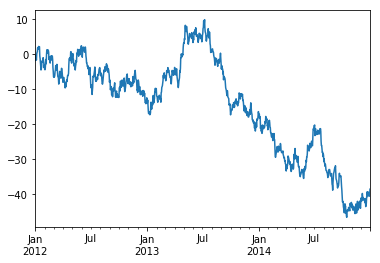

In [35]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index= pd.Series(range(0,1096)))
'''
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01','2014-12-31'))'''
walk_ts = s.cumsum()
walk_ts.plot()

In [3]:
# tells pandas plots to use a default style
# which has a background fill
pd.options.display.mpl_style = 'default'
walk_ts.plot()

OptionError: 'You can only set the value of existing options'

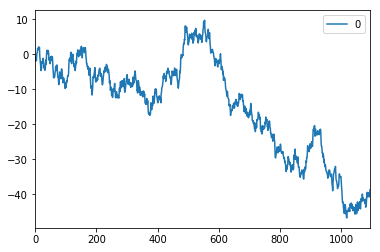

In [4]:
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot()

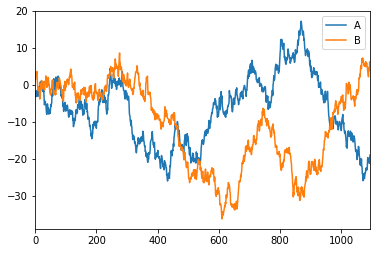

In [5]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2),index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

In [6]:
# copy the walk
df2 = walk_df.copy()
# add a column C which is 0 .. 1096
df2

              A         B
0     -1.878324  1.362367
1     -2.804186  1.427261
2     -3.241758  3.165368
3     -2.750550  3.332685
4     -1.620667  2.930017
...         ...       ...
1091 -20.952692  4.689279
1092 -20.476150  3.965521
1093 -21.250542  4.243064
1094 -19.930892  6.237730
1095 -19.016886  3.836418

[1096 rows x 2 columns]

In [7]:
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
df2

              A         B     C
0     -1.878324  1.362367     0
1     -2.804186  1.427261     1
2     -3.241758  3.165368     2
3     -2.750550  3.332685     3
4     -1.620667  2.930017     4
...         ...       ...   ...
1091 -20.952692  4.689279  1091
1092 -20.476150  3.965521  1092
1093 -21.250542  4.243064  1093
1094 -19.930892  6.237730  1094
1095 -19.016886  3.836418  1095

[1096 rows x 3 columns]

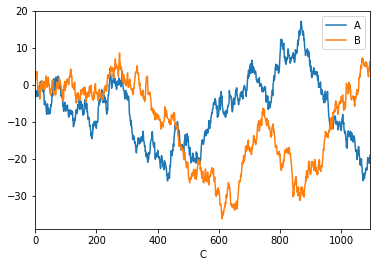

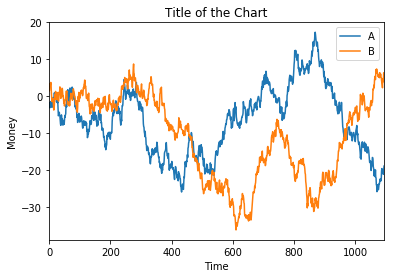

In [8]:
# instead of dates on the x axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);
# the title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')
# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

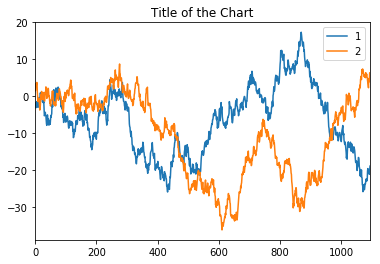

In [9]:
# change the legend items to be different
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')
# this sets the legend labels
ax.legend(['1', '2']);

|Text|Code|
|-------|-------|
|best|0|
|upper right|1|
|upper left|2|
|lower left|3|
|lower right|4|
|right|5|
|center left|6|
|center right|7|
|lower center|8|
|upper center|9|
|center|10|


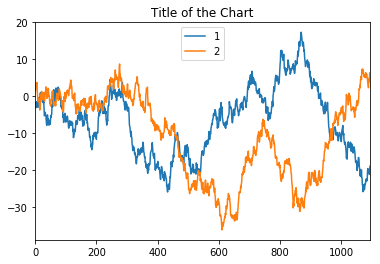

In [10]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')
# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

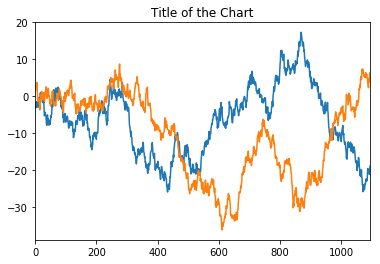

In [11]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

|Text|Code|
|-------|-------|
|b|Blue|
|g|Green|
|r|Red|
|c|Cyan|
|m|Magenta|
|y|Yellow|
|k|Black|
|w|White|


In [13]:
walk_df

              A         B
0     -1.878324  1.362367
1     -2.804186  1.427261
2     -3.241758  3.165368
3     -2.750550  3.332685
4     -1.620667  2.930017
...         ...       ...
1091 -20.952692  4.689279
1092 -20.476150  3.965521
1093 -21.250542  4.243064
1094 -19.930892  6.237730
1095 -19.016886  3.836418

[1096 rows x 2 columns]

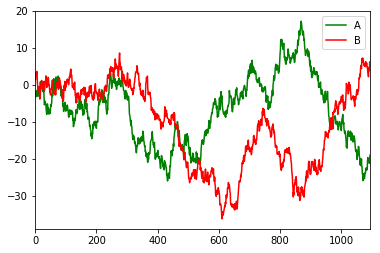

In [14]:
walk_df.plot(style=['g', '#FF0000']);

|   |   |
|---|---|
|'--' | dashed|
|'-' | solid|
|'-.' | dot-dashed|
|'.' | points|
|':' | dotted|


In [16]:
# show us different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted','Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                            1 : t**1.5,
                            2 : t**2.0,
                            3 : t**2.5,
                            4 : t**3.0})
line_style

      0          1      2          3        4
0   0.0   0.000000   0.00   0.000000    0.000
1   0.2   0.089443   0.04   0.017889    0.008
2   0.4   0.252982   0.16   0.101193    0.064
3   0.6   0.464758   0.36   0.278855    0.216
4   0.8   0.715542   0.64   0.572433    0.512
..  ...        ...    ...        ...      ...
20  4.0   8.000000  16.00  32.000000   64.000
21  4.2   8.607439  17.64  36.151242   74.088
22  4.4   9.229518  19.36  40.609879   85.184
23  4.6   9.865901  21.16  45.383144   97.336
24  4.8  10.516273  23.04  50.478111  110.592

[25 rows x 5 columns]

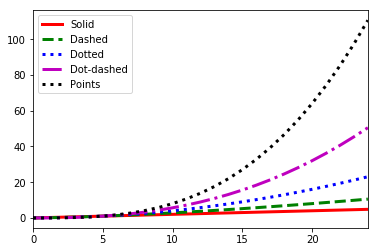

In [18]:
# generate the plot, specifying color and line style for each line
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
# set the legend
ax.legend(legend_labels, loc='upper left');

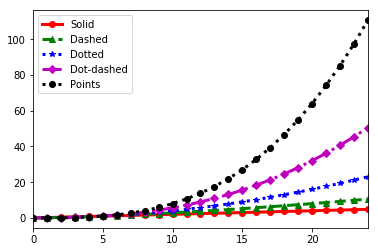

In [19]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*','m-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text xticklabel objects>)

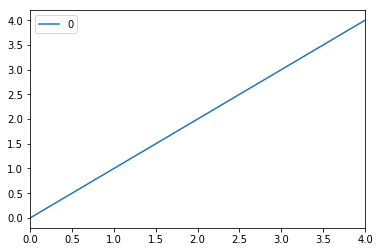

In [25]:
# a simple plot to use to examine ticks
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()

ticks, labels = plt.xticks()
ticks  , labels

([<matplotlib.axis.YTick at 0x1e01edbd160>,
 <a list of 7 Text yticklabel objects>)

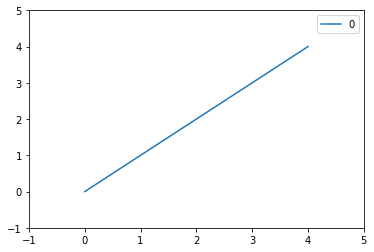

In [28]:
# resize x axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6))
plt.yticks(np.arange(-1, 6))

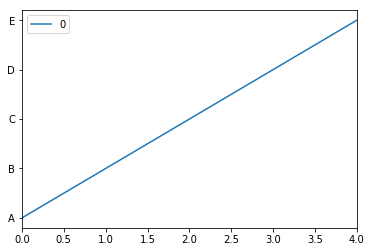

In [29]:
# rename y axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

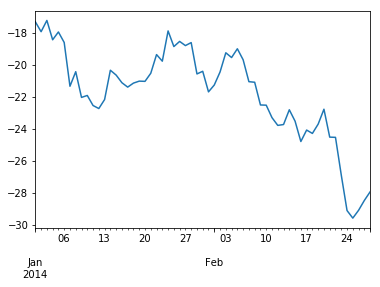

In [39]:
walk_ts.loc['2014-01':'2014-02'].plot()

In [37]:
walk_ts.loc['2014-01':'2014-02']

2014-01-01   -17.330699
2014-01-02   -17.950214
2014-01-03   -17.247498
2014-01-04   -18.453000
2014-01-05   -17.967249
                ...    
2014-02-24   -29.109220
2014-02-25   -29.581351
2014-02-26   -29.093246
2014-02-27   -28.478221
2014-02-28   -27.940660
Freq: D, Length: 59, dtype: float64